En este notebook se analizan algunas opciones para la elección de un modelo a la hora de realizar una predicción en el rango de posiciones que un equipo podría quedar en función de sus carasteristicas y de las propias de la competición.


   * [1 Importacion de los datos<b>](#1)
   
   * [2. Segunda Aproximacion - Kfold<b>](#11)
      * [2.1 Arboles de decisión - Kfold</b>](#12)
      * [2.2 LogisticRegression - Kfold</b>](#13)
      * [2.3 Random Forest - Kfold</b>](#14)
      
   * [3. Tercera Aproximación - StratifiedKFold<b>](#15)
      * [3.1 Arbol de Decisión - StratifiedKFold</b>](#16)
      * [3.2 Random Forest - StratifiedKFold</b>](#17)
      * [3.3 Logisctic Regression - StratifiedKFold</b>](#18)
      
   * [4 Elección del modelos<b>](#19)
    





In [25]:
# Importación de librerias que se van a utilizar:

import pandas as pd
import numpy as np

import seaborn as sn
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [26]:
import warnings
warnings.simplefilter("ignore")

   <a id=1></a>
**<h2>1 Importacion de los datos</h2>**

In [27]:
%cd C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataModel
    
modelo = pd.read_csv("model.csv", index_col = 0)
modelo.shape

C:\Users\Víctor Galán Alcón\Desktop\Kaggle\Data\dataModel


(151217, 44)

   <a id=5></a>
**<h2>2 Primera Aproximación</h2>**

   <a id=6></a>
**<h3>2.1 Creación de una muestra de entrenamiento y validación</h3>**

Antes de comenzar con la creación del modelo es necesario separar la muestra en una para el entrenamiento y otra para la validación.

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

Este estimador escala y traduce cada característica individualmente de modo que esté en el rango dado en el conjunto de entrenamiento.

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.33,random_state = 0)

   <a id=7></a>
**<h3>2.2 Importación de las métricas</h3>**

Antes de implemenar los diferentes modelos se puede definir una función para disponer de las métricas de forma fácil.

In [1]:
def metricas(y_train,y_train_pred,y_test,y_test_pred):

        print('Resultados en el conjunto de entrenamiento')
        print(' Accuracy: %2f' % accuracy_score(y_train, y_train_pred))
        print(' Precision: %2f' % precision_score(y_train, y_train_pred, average = 'macro'))
        print(' Recall: %2f' % recall_score(y_train, y_train_pred, average = 'macro'))
        print('')
        print(' Resultados en el conjunto de test')
        print(' Accuracy: %2f' % accuracy_score(y_test, y_test_pred))
        print(' Precision: %2f' % precision_score(y_test, y_test_pred,  average = 'macro'))
        print(' Recall: %2f' % recall_score(y_test, y_test_pred, average = 'macro'))
    
        conf_mat = confusion_matrix(y_test, y_test_pred)

        df_cm = pd.DataFrame(conf_mat, columns=np.unique(y), index = np.unique(y))

        df_cm.rename(index = {10: "<10", 
                         20:"11-20",
                         30:"21-30",
                         40:"31-40",
                         50:"41-50",
                         60:"51-60",
                         70:"61-70",
                         80:"71-80",
                         90:"81-90",
                         100:"91-100",
                         110:"101-110",
                         120:"111-120",
                         130:"121-130",
                         140:"131-140",
                         150:"141-150",
                         200:"150>"  
                        }, 
                        inplace = True)

        df_cm.rename(columns = {10: "<10", 
                         20:"11-20",
                         30:"21-30",
                         40:"31-40",
                         50:"41-50",
                         60:"51-60",
                         70:"61-70",
                         80:"71-80",
                         90:"81-90",
                         100:"91-100",
                         110:"101-110",
                         120:"111-120",
                         130:"121-130",
                         140:"131-140",
                         150:"141-150",
                         200:"150>"  
                        }, 
                        inplace = True)

        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (12.5,10))

        sn.set(font_scale=1.4)#for label size
        sn.heatmap(df_cm, cmap="Blues", annot=True,fmt = "d",annot_kws={"size": 10}, vmax = 1700)


Para la creación del modelo se pueden utilizar las diferentes técnicas estudiadas: regresión logística, árboles de decisión, maquinas vector soporte y vecinos más cercanos.

   <a id=8></a>
**<h3>2.3 Regresión logística</h3>**

C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Resultados en el conjunto de entrenamiento
 Accuracy: 0.854671
 Precision: 0.130308
 Recall: 0.085802

 Resultados en el conjunto de test
 Accuracy: 0.858022
 Precision: 0.121295
 Recall: 0.084473


C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


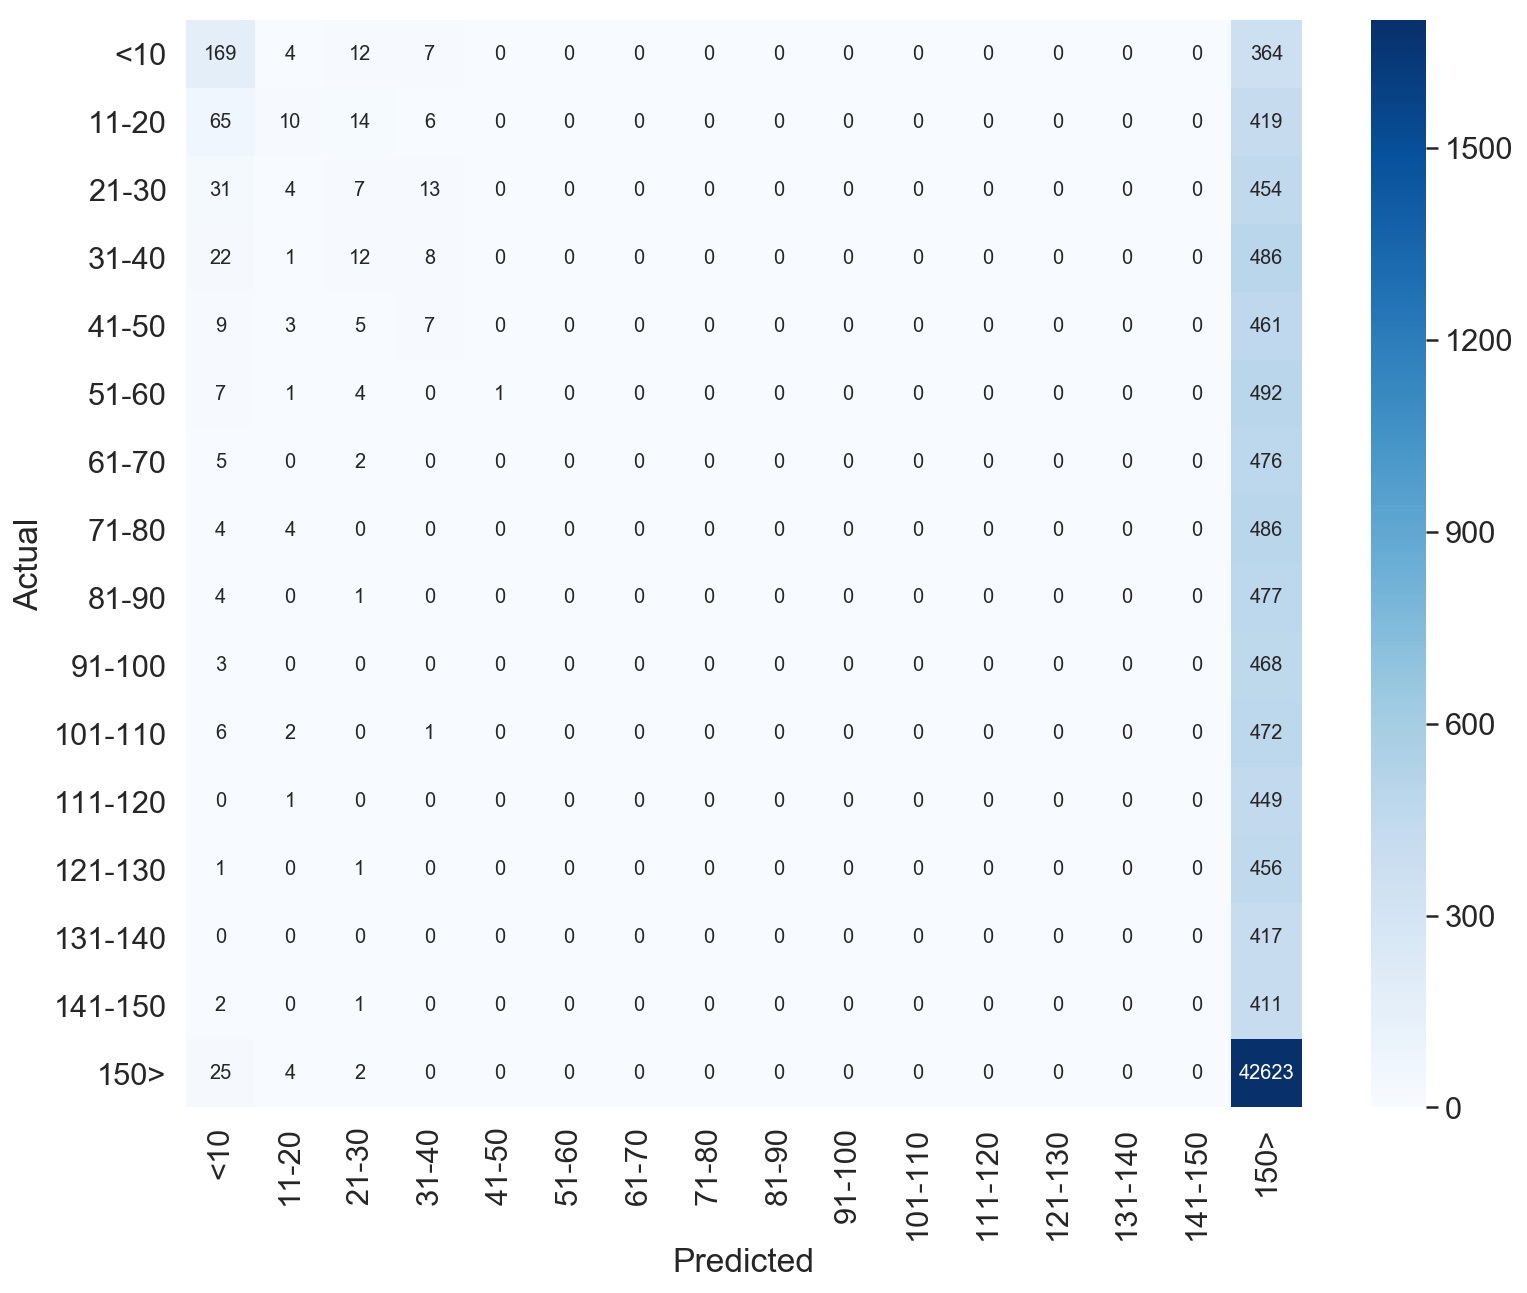

In [47]:
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_train_pred = logisticRegr.predict(x_train)
y_test_pred = logisticRegr.predict(x_test)

metricas(y_train,y_train_pred,y_test,y_test_pred)

   <a id=9></a>
**<h3>2.4 Árboles de decisión</h3>**

Resultados en el conjunto de entrenamiento
 Accuracy: 0.854671
 Precision: 0.130308
 Recall: 0.085802

 Resultados en el conjunto de test
 Accuracy: 0.858022
 Precision: 0.121295
 Recall: 0.084473


C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


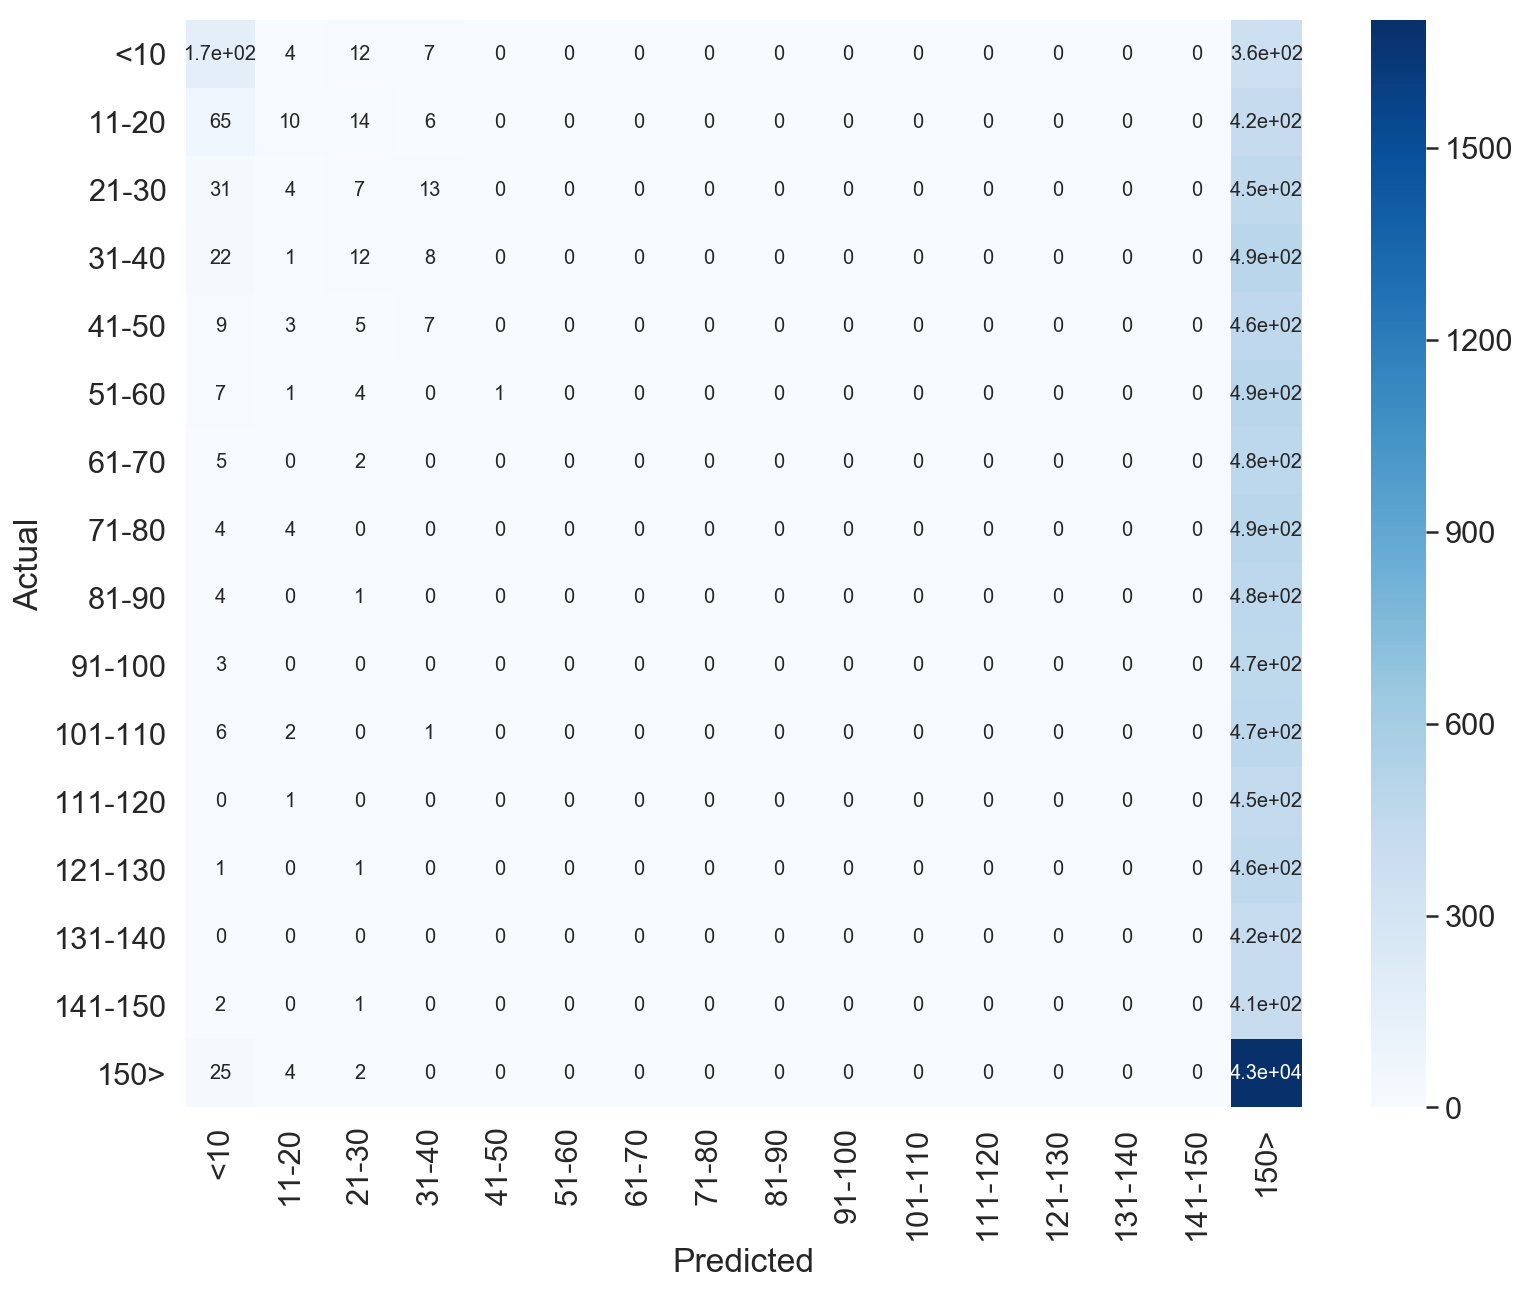

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 2,
                              random_state = 0)
tree.fit(x_train, y_train)
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)

metricas(y_train,y_train_pred,y_test,y_test_pred)

Resultados en el conjunto de entrenamiento
 Accuracy: 0.854671
 Precision: 0.130308
 Recall: 0.085802

 Resultados en el conjunto de test
 Accuracy: 0.858022
 Precision: 0.121295
 Recall: 0.084473


C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


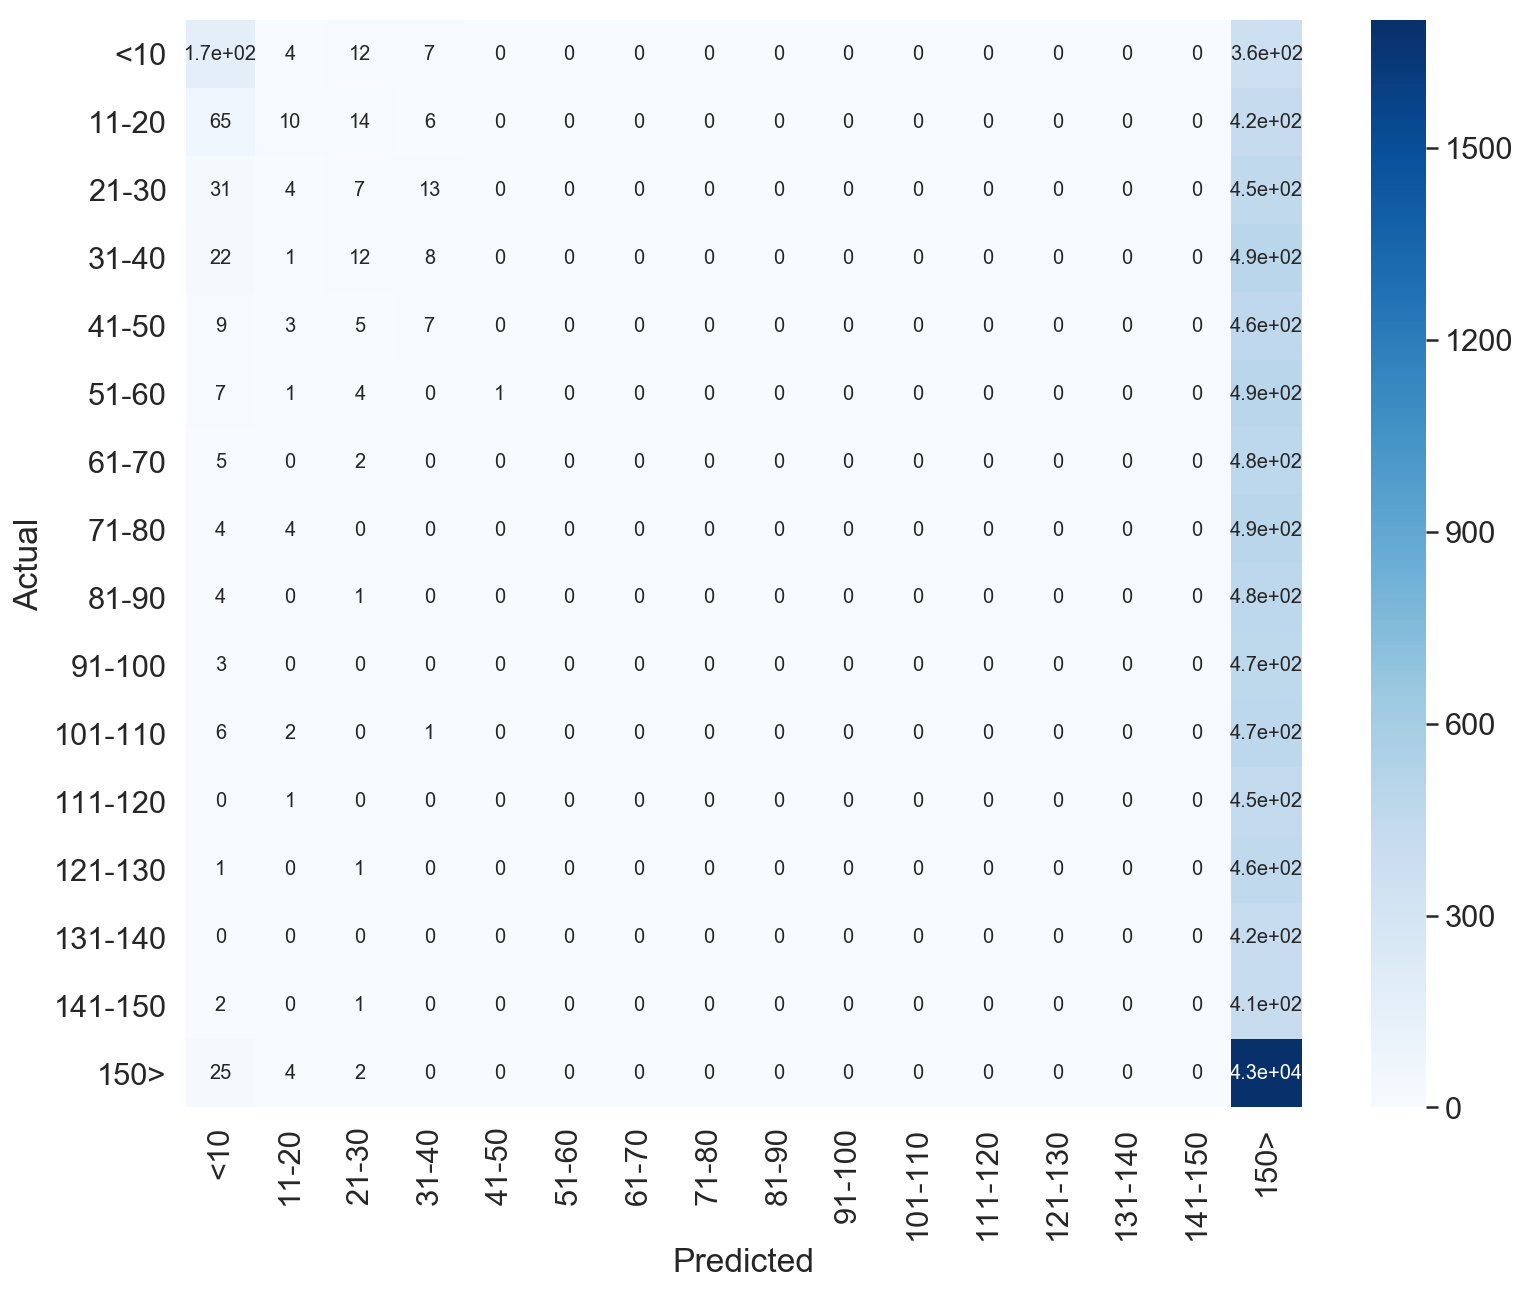

In [40]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 4,
                              random_state = 2)
tree.fit(x_train, y_train)
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)

metricas(y_train,y_train_pred,y_test,y_test_pred)

   <a id=10></a>
**<h3>2.5 Random Forest</h3>**

Se puede repetir el proceso con el clasificador `RandomForestClassifier`. Inicialmente se puede probar con una profundidad de 6 niveles.

Resultados en el conjunto de entrenamiento
 Accuracy: 0.854671
 Precision: 0.130308
 Recall: 0.085802

 Resultados en el conjunto de test
 Accuracy: 0.858022
 Precision: 0.121295
 Recall: 0.084473


C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Víctor Galán Alcón\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


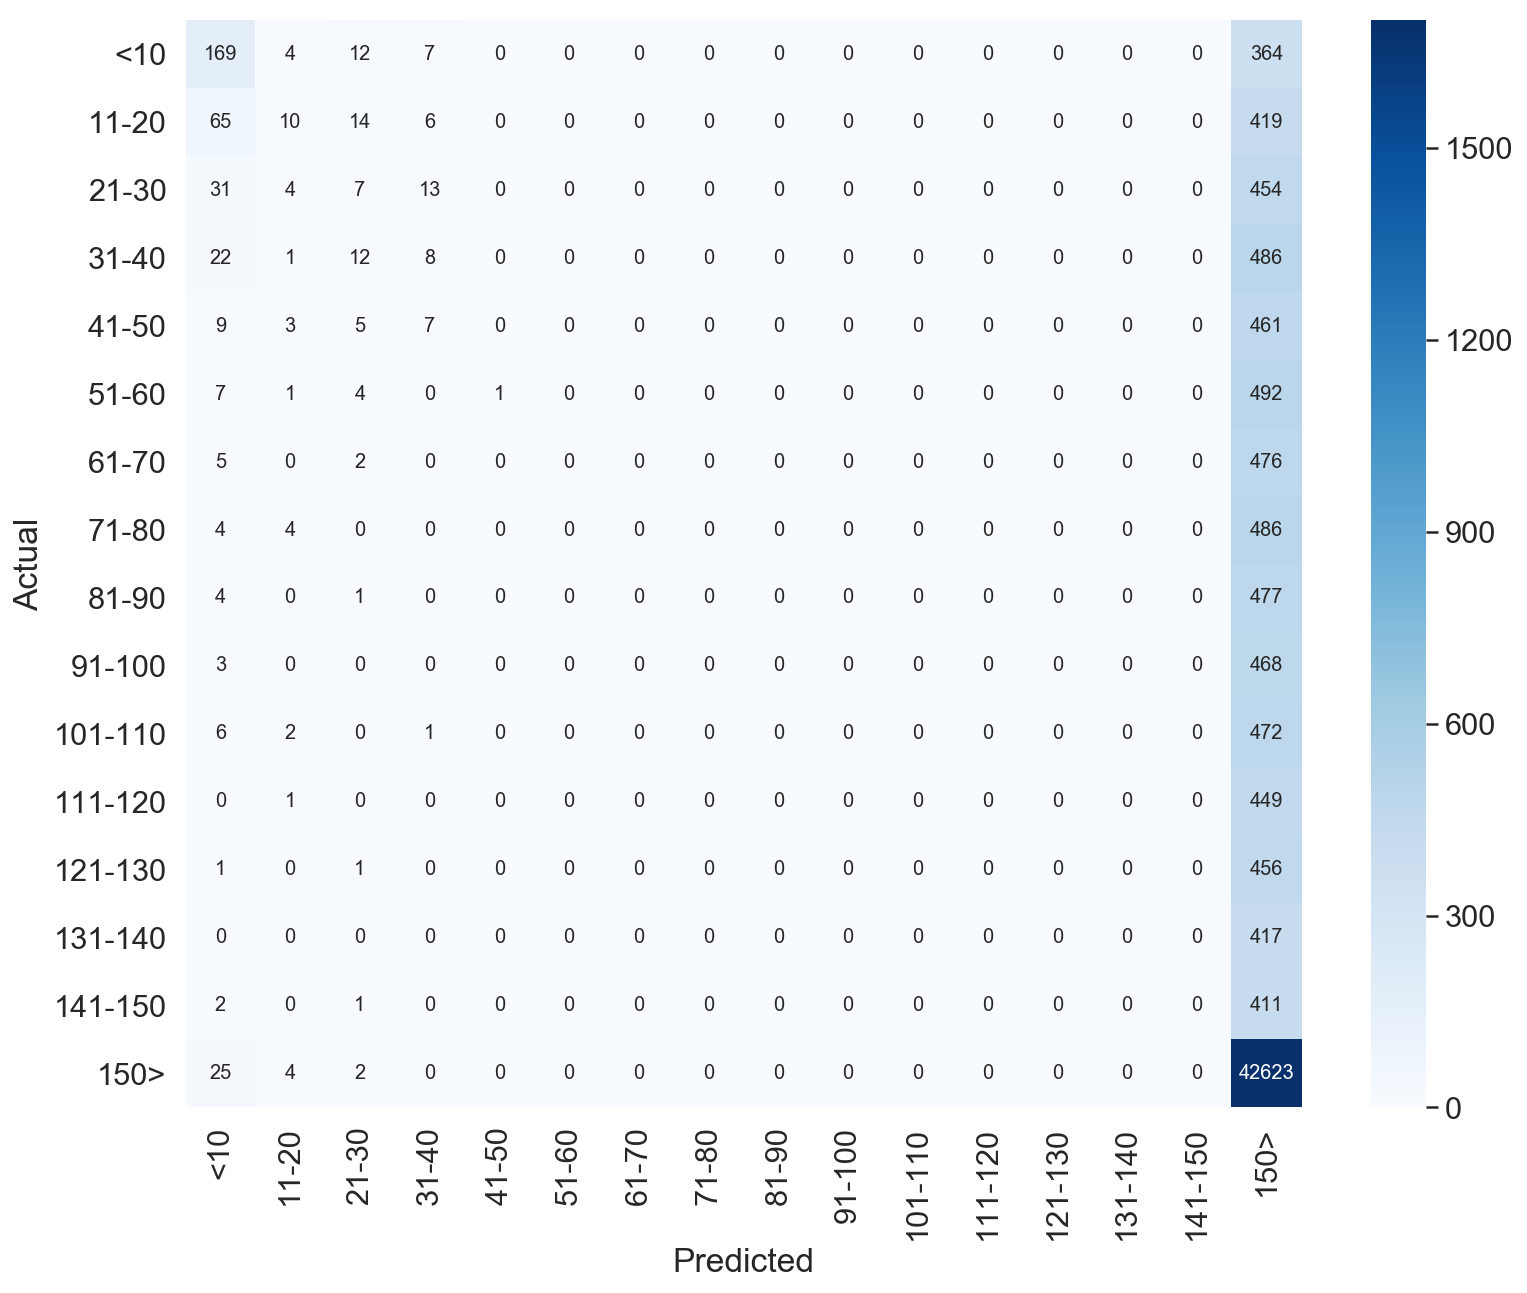

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy',
                                max_depth = 6,
                                n_estimators = 20,
                                random_state = 0)

forest.fit(x_train, y_train)
y_pred_train = forest.predict(x_train)
y_pred_test = forest.predict(x_test)

metricas(y_train,y_train_pred,y_test,y_test_pred)


   <a id=11></a>
**<h2>3 Segunda Aproximacion - Kfold</h2>**

   <a id=12></a>
**<h3>3.1 Arboles de decisión - Kfold</h3>**

In [96]:
score_mean_tree = []
precision_tree = []
recall_tree = []

a = 3

for d in range(15):

    kfold = KFold(n_splits = a,shuffle=True)
    
    print("cv:", a)
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(31):
        
            tree = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = n,
                                  random_state = 0)

            print("max_depth:", n)

            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kfold.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                tree.fit(xtr,ytr)

                score = accuracy_score(yvl,tree.predict(xvl))
                precision = precision_score(yvl, tree.predict(xvl), average = 'macro')
                recall = recall_score(yvl, tree.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_tree.append(cv_score_mean)
    precision_tree.append(cv_precision_mean)
    recall_tree.append(cv_recall_mean)

cv: 3
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
max_depth: 32
cv: 5
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
max_depth: 32
cv: 7
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 1

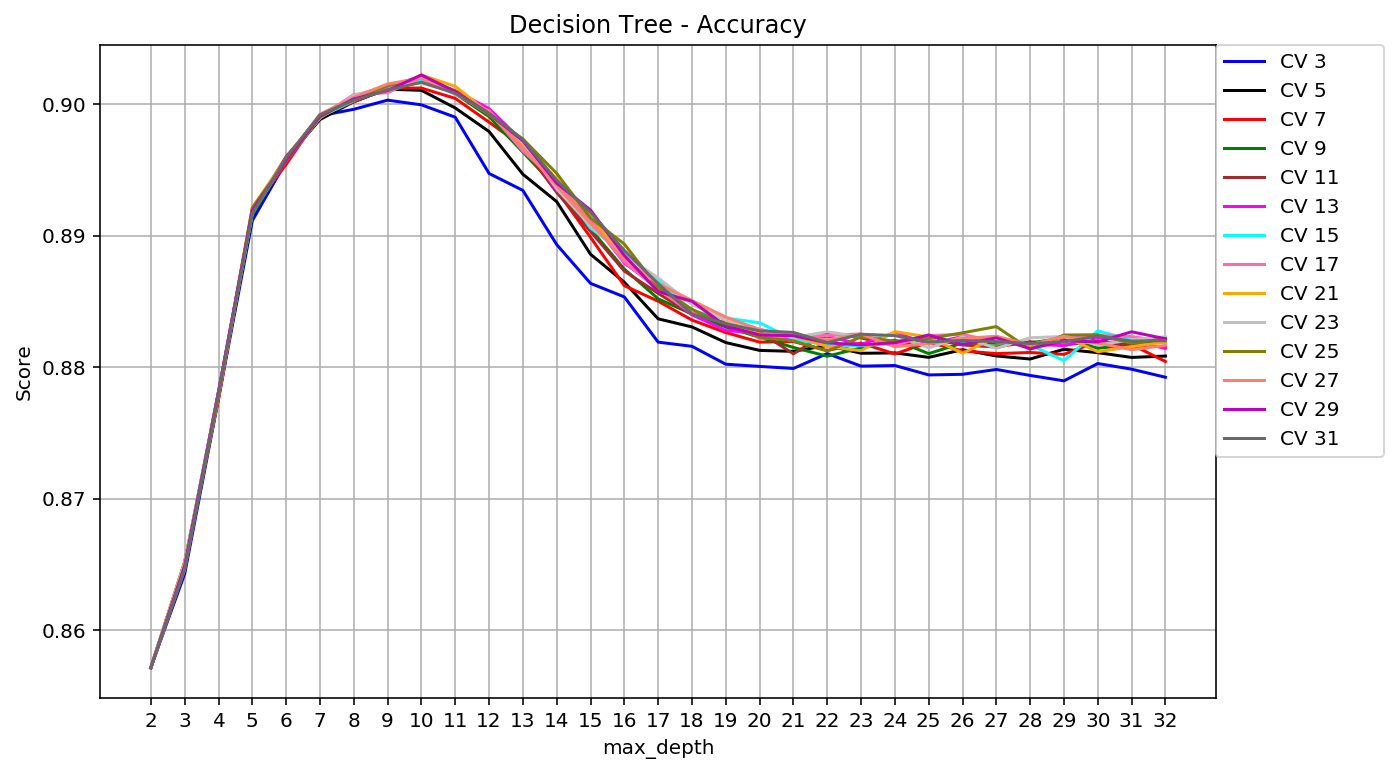

In [99]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31","32"]

ax.plot(c,score_mean_tree[0], color = 'Blue', label = 'CV 3')
ax.plot(c,score_mean_tree[1], color = 'Black', label = 'CV 5')
ax.plot(c,score_mean_tree[2], color = 'Red', label = 'CV 7')
ax.plot(c,score_mean_tree[3], color = 'Green', label = 'CV 9')
ax.plot(c,score_mean_tree[4], color = 'Brown', label = 'CV 11')
ax.plot(c,score_mean_tree[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,score_mean_tree[6], color = 'cyan', label = 'CV 15')
ax.plot(c,score_mean_tree[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,score_mean_tree[8], color = 'orange', label = 'CV 21')
ax.plot(c,score_mean_tree[9], color = 'silver', label = 'CV 23')
ax.plot(c,score_mean_tree[10], color = 'olive', label = 'CV 25')
ax.plot(c,score_mean_tree[11], color = 'salmon', label = 'CV 27')
ax.plot(c,score_mean_tree[12], color = 'm', label = 'CV 29')
ax.plot(c,score_mean_tree[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Accuracy')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

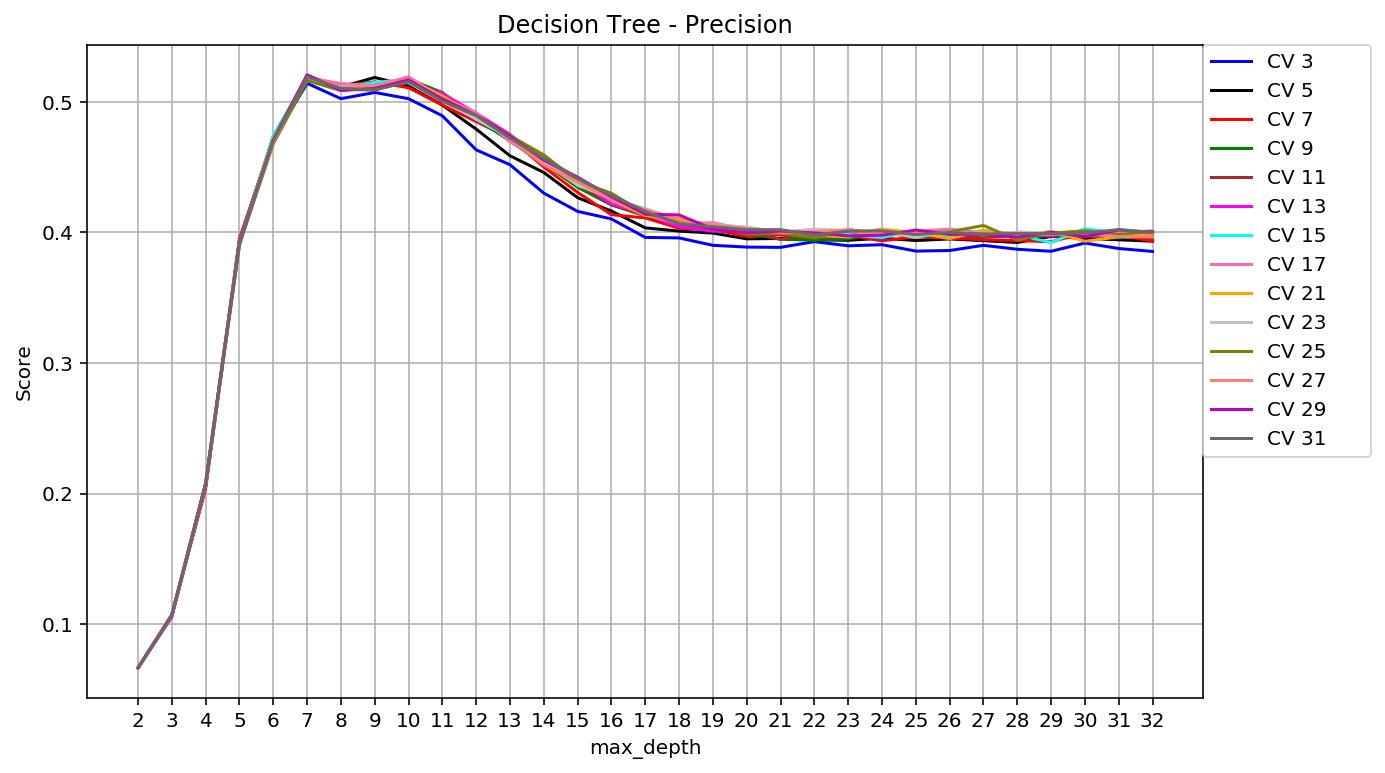

In [100]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31","32"]

ax.plot(c,precision_tree[0], color = 'Blue', label = 'CV 3')
ax.plot(c,precision_tree[1], color = 'Black', label = 'CV 5')
ax.plot(c,precision_tree[2], color = 'Red', label = 'CV 7')
ax.plot(c,precision_tree[3], color = 'Green', label = 'CV 9')
ax.plot(c,precision_tree[4], color = 'Brown', label = 'CV 11')
ax.plot(c,precision_tree[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,precision_tree[6], color = 'cyan', label = 'CV 15')
ax.plot(c,precision_tree[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,precision_tree[8], color = 'orange', label = 'CV 21')
ax.plot(c,precision_tree[9], color = 'silver', label = 'CV 23')
ax.plot(c,precision_tree[10], color = 'olive', label = 'CV 25')
ax.plot(c,precision_tree[11], color = 'salmon', label = 'CV 27')
ax.plot(c,precision_tree[12], color = 'm', label = 'CV 29')
ax.plot(c,precision_tree[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Precision')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

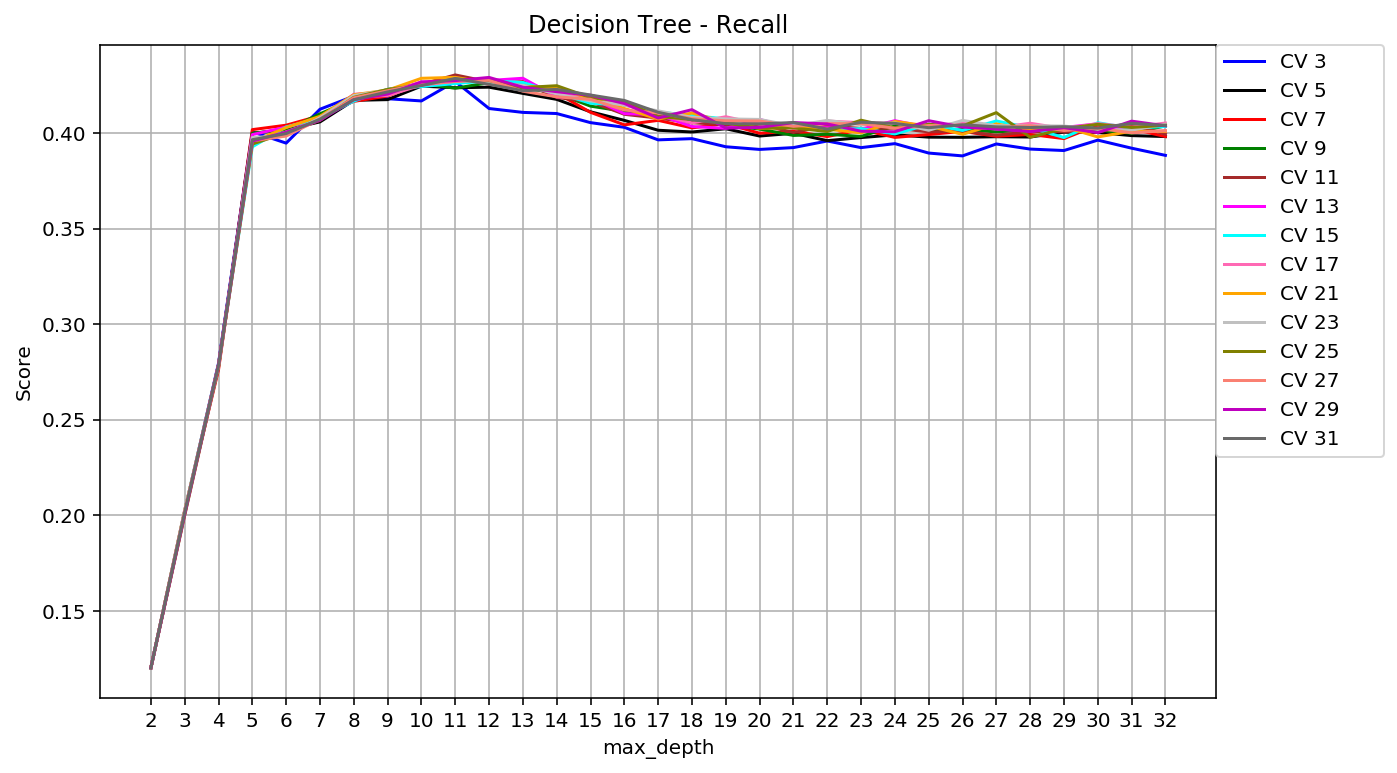

In [101]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31","32"]

ax.plot(c,recall_tree[0], color = 'Blue', label = 'CV 3')
ax.plot(c,recall_tree[1], color = 'Black', label = 'CV 5')
ax.plot(c,recall_tree[2], color = 'Red', label = 'CV 7')
ax.plot(c,recall_tree[3], color = 'Green', label = 'CV 9')
ax.plot(c,recall_tree[4], color = 'Brown', label = 'CV 11')
ax.plot(c,recall_tree[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,recall_tree[6], color = 'cyan', label = 'CV 15')
ax.plot(c,recall_tree[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,recall_tree[8], color = 'orange', label = 'CV 21')
ax.plot(c,recall_tree[9], color = 'silver', label = 'CV 23')
ax.plot(c,recall_tree[10], color = 'olive', label = 'CV 25')
ax.plot(c,recall_tree[11], color = 'salmon', label = 'CV 27')
ax.plot(c,recall_tree[12], color = 'm', label = 'CV 29')
ax.plot(c,recall_tree[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Recall')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=13></a>
**<h3>3.2 LogisticRegression - Kfold</h3>**

In [103]:
cv_score_mean_lr =[]
cv_precision_mean_lr = []
cv_recall_mean_lr = []

n = 3

for a in range(15):
    
        print("CV:", n)
        
        lr= LogisticRegression()


        kf = KFold(n_splits=n+2,shuffle=True)

        cv_score =[]
        cv_precision = []
        cv_recall = []
        i=1

        for train_index,test_index in kf.split(X,y):

            xtr,xvl = X[train_index],X[test_index]
            ytr,yvl = y[train_index],y[test_index]

            lr.fit(xtr,ytr)
            score = accuracy_score(yvl,lr.predict(xvl))  
            precision = precision_score(yvl, lr.predict(xvl), average = 'macro')
            recall = recall_score(yvl, lr.predict(xvl), average = 'macro')

            cv_score.append(score)  
            cv_precision.append(precision)
            cv_recall.append(recall)

            i+=1
            
        n +=2 
        
        score_mean = np.mean(cv_score)
        precision_mean = np.mean(cv_precision)
        recall_mean = np.mean(cv_recall)
        
        cv_score_mean_lr.append(score_mean)  
        cv_precision_mean_lr.append(precision_mean)
        cv_recall_mean_lr.append(recall_mean)


CV: 3
CV: 5
CV: 7
CV: 9
CV: 11
CV: 13
CV: 15
CV: 17
CV: 19
CV: 21
CV: 23
CV: 25
CV: 27
CV: 29
CV: 31


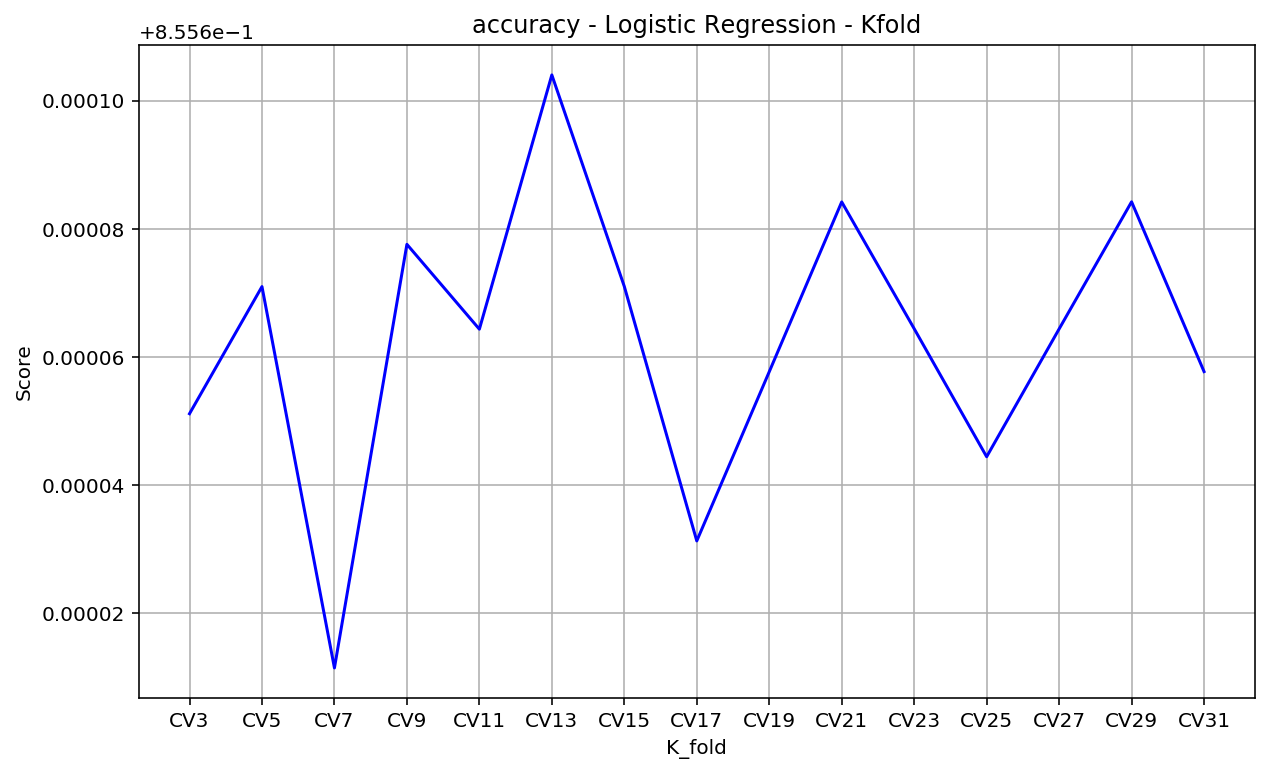

In [104]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_score_mean_lr, color = 'Blue')



plt.xlabel('K_fold')
plt.ylabel('Score')
plt.title('accuracy - Logistic Regression - Kfold')


plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

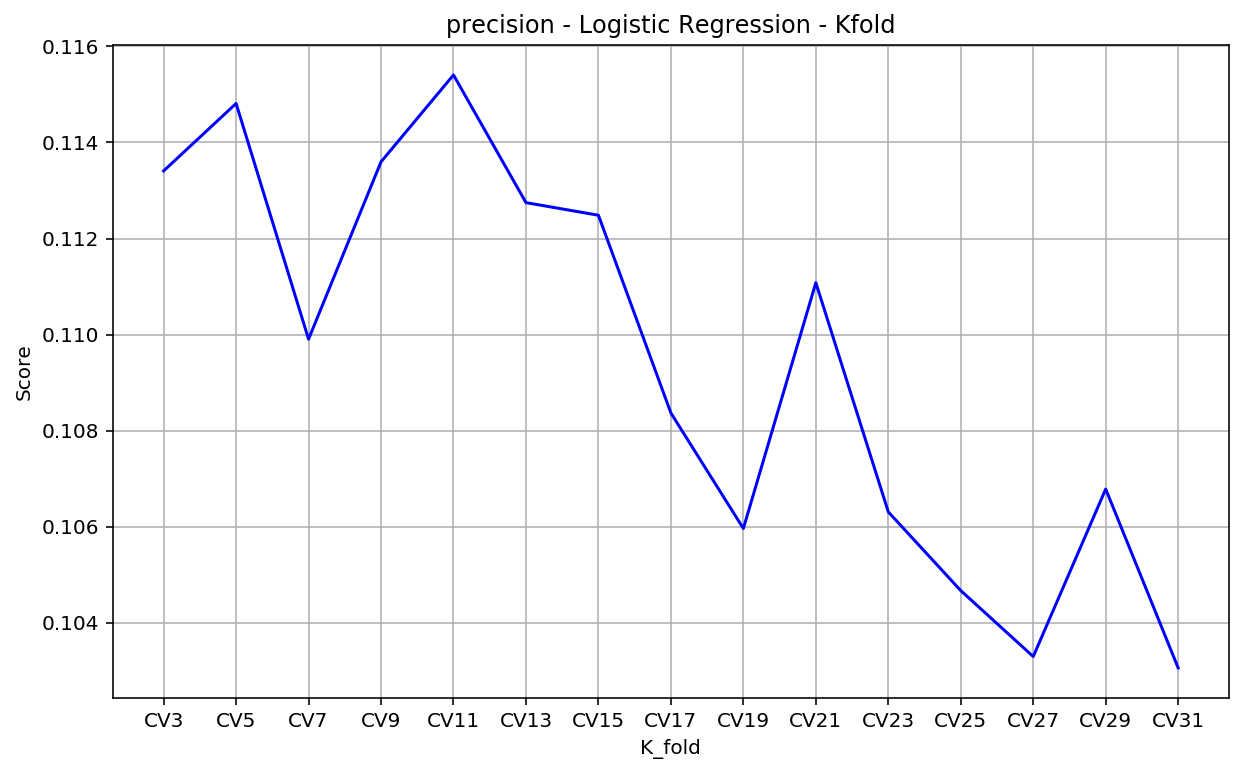

In [108]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_precision_mean_lr, color = 'Blue')



plt.xlabel('K_fold')
plt.ylabel('Score')
plt.title('precision - Logistic Regression - Kfold')


plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

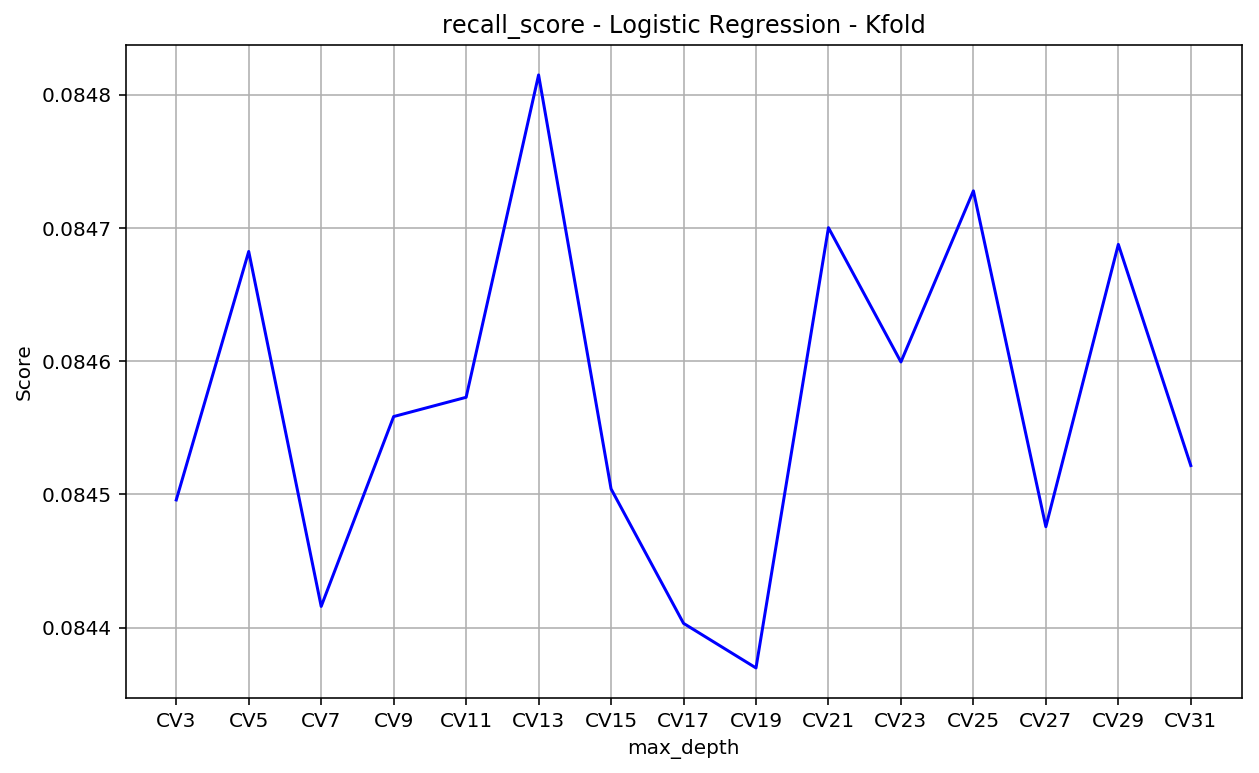

In [109]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_recall_mean_lr, color = 'Blue')



plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('recall_score - Logistic Regression - Kfold')



plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=14></a>
**<h3>3.3 Random Forest - Kfold</h3>**

In [61]:
score_mean_rf = []
precision_rf = []
recall_rf = []

a = 3

for d in range(15):

    kfold = KFold(n_splits = a,shuffle=True)
    
    print("cv:", a)
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(30):
        
            rf = RandomForestClassifier(n_estimators=n)

            print("max_depth:", n)

            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kfold.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                rf.fit(xtr,ytr)

                score = accuracy_score(yvl,rf.predict(xvl))
                precision = precision_score(yvl, rf.predict(xvl), average = 'macro')
                recall = recall_score(yvl, rf.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_rf.append(cv_score_mean)
    precision_rf.append(cv_precision_mean)
    recall_rf.append(cv_recall_mean)

cv: 3
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
cv: 5
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
cv: 7
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 1

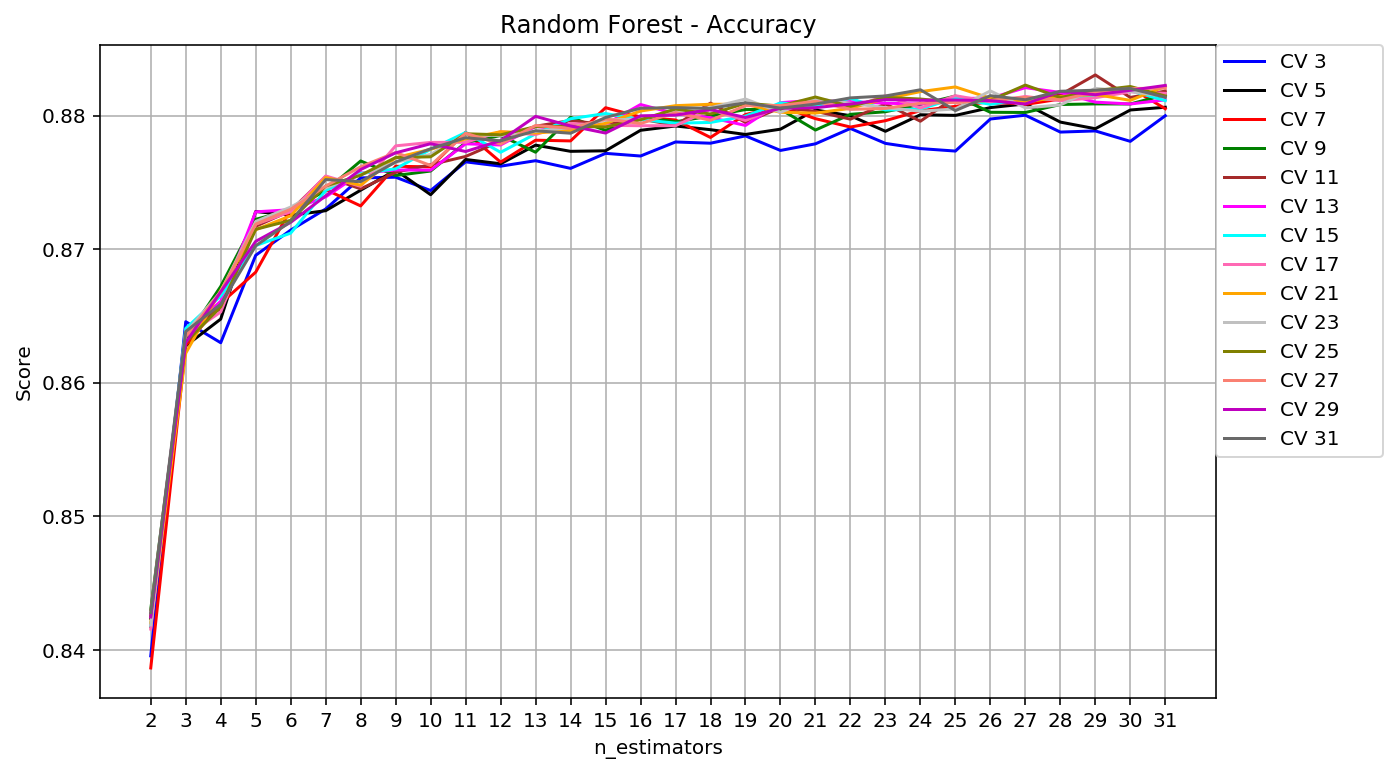

In [85]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,score_mean_rf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,score_mean_rf[1], color = 'Black', label = 'CV 5')
ax.plot(c,score_mean_rf[2], color = 'Red', label = 'CV 7')
ax.plot(c,score_mean_rf[3], color = 'Green', label = 'CV 9')
ax.plot(c,score_mean_rf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,score_mean_rf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,score_mean_rf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,score_mean_rf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,score_mean_rf[8], color = 'orange', label = 'CV 21')
ax.plot(c,score_mean_rf[9], color = 'silver', label = 'CV 23')
ax.plot(c,score_mean_rf[10], color = 'olive', label = 'CV 25')
ax.plot(c,score_mean_rf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,score_mean_rf[12], color = 'm', label = 'CV 29')
ax.plot(c,score_mean_rf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Accuracy')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

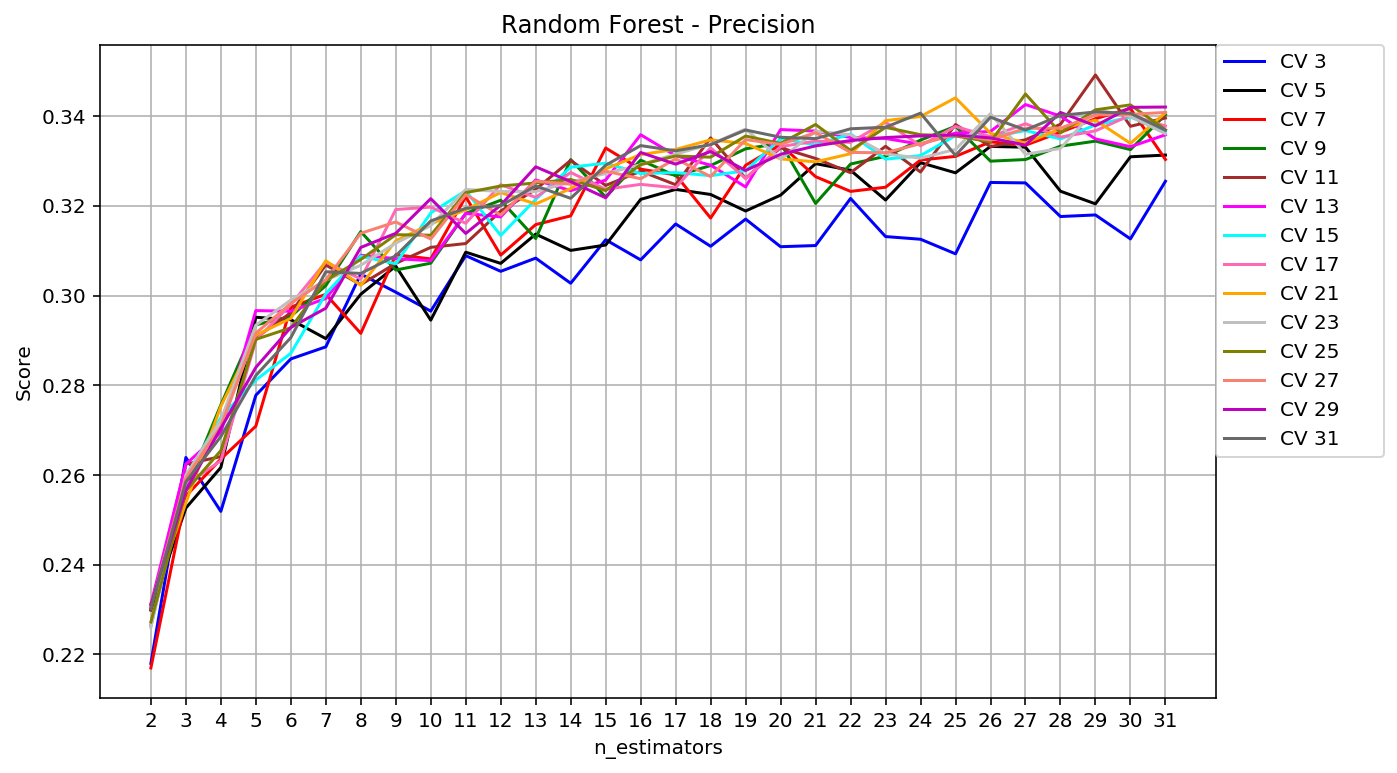

In [86]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,precision_rf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,precision_rf[1], color = 'Black', label = 'CV 5')
ax.plot(c,precision_rf[2], color = 'Red', label = 'CV 7')
ax.plot(c,precision_rf[3], color = 'Green', label = 'CV 9')
ax.plot(c,precision_rf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,precision_rf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,precision_rf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,precision_rf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,precision_rf[8], color = 'orange', label = 'CV 21')
ax.plot(c,precision_rf[9], color = 'silver', label = 'CV 23')
ax.plot(c,precision_rf[10], color = 'olive', label = 'CV 25')
ax.plot(c,precision_rf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,precision_rf[12], color = 'm', label = 'CV 29')
ax.plot(c,precision_rf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Precision')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

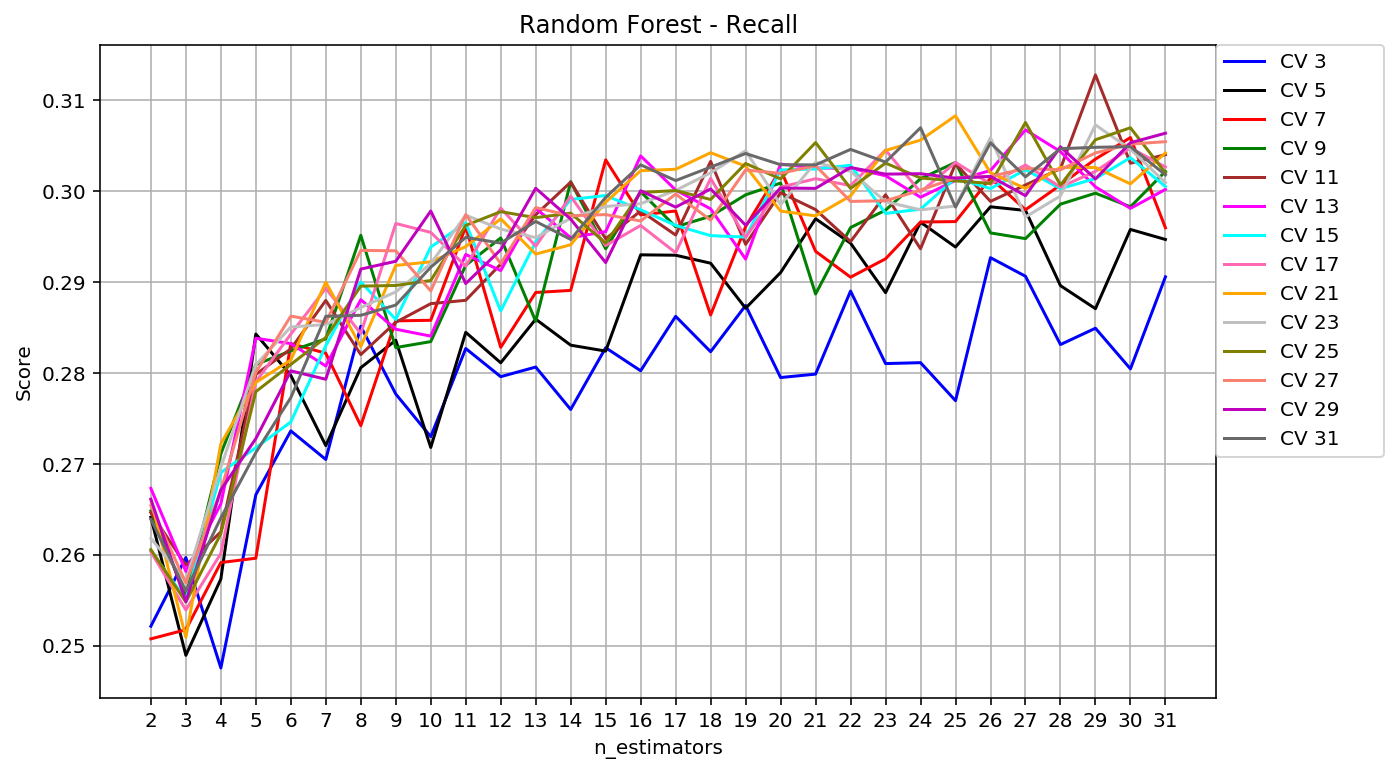

In [87]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,recall_rf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,recall_rf[1], color = 'Black', label = 'CV 5')
ax.plot(c,recall_rf[2], color = 'Red', label = 'CV 7')
ax.plot(c,recall_rf[3], color = 'Green', label = 'CV 9')
ax.plot(c,recall_rf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,recall_rf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,recall_rf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,recall_rf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,recall_rf[8], color = 'orange', label = 'CV 21')
ax.plot(c,recall_rf[9], color = 'silver', label = 'CV 23')
ax.plot(c,recall_rf[10], color = 'olive', label = 'CV 25')
ax.plot(c,recall_rf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,recall_rf[12], color = 'm', label = 'CV 29')
ax.plot(c,recall_rf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Recall')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=15></a>
**<h2>3 Tercera Aproximación - StratifiedKFold</h2>**

   <a id=16></a>
**<h3>3.1 Arbol de Decisión - StratifiedKFold</h3>**

In [65]:
score_mean_tree_kf = []
precision_tree_kf = []
recall_tree_kf = []

a = 3

for d in range(15):

    #kfold = KFold(n_splits = a,shuffle=True)
    kf = StratifiedKFold(n_splits=a,shuffle=True)
    
    print("cv:", a)
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(30):
        
            tree = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = n,
                                  random_state = 0)

            print("max_depth:", n)

            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kf.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                tree.fit(xtr,ytr)

                score = accuracy_score(yvl,tree.predict(xvl))
                precision = precision_score(yvl, tree.predict(xvl), average = 'macro')
                recall = recall_score(yvl, tree.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_tree_kf.append(cv_score_mean)
    precision_tree_kf.append(cv_precision_mean)
    recall_tree_kf.append(cv_recall_mean)

cv: 3
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
cv: 5
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
cv: 7
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 1

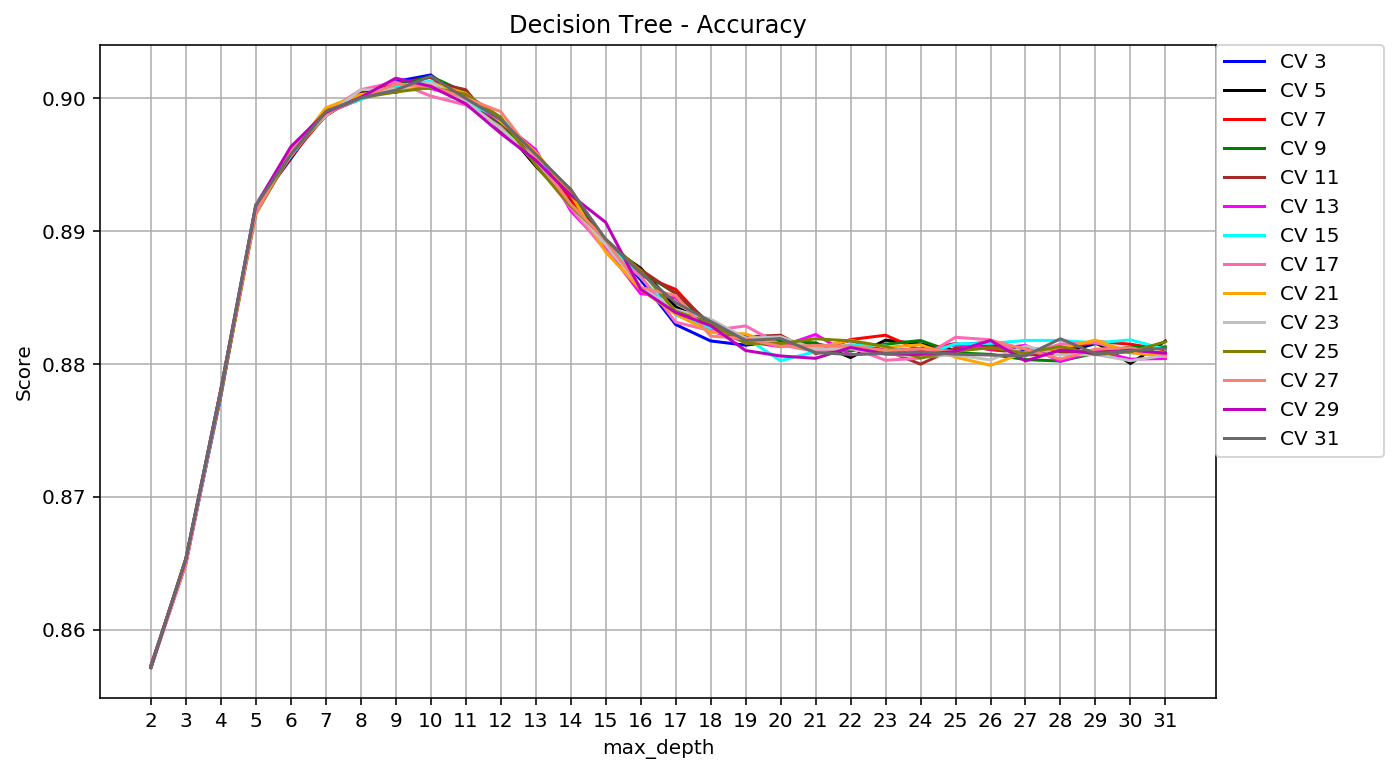

In [88]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,score_mean_tree_kf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,score_mean_tree_kf[1], color = 'Black', label = 'CV 5')
ax.plot(c,score_mean_tree_kf[2], color = 'Red', label = 'CV 7')
ax.plot(c,score_mean_tree_kf[3], color = 'Green', label = 'CV 9')
ax.plot(c,score_mean_tree_kf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,score_mean_tree_kf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,score_mean_tree_kf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,score_mean_tree_kf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,score_mean_tree_kf[8], color = 'orange', label = 'CV 21')
ax.plot(c,score_mean_tree_kf[9], color = 'silver', label = 'CV 23')
ax.plot(c,score_mean_tree_kf[10], color = 'olive', label = 'CV 25')
ax.plot(c,score_mean_tree_kf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,score_mean_tree_kf[12], color = 'm', label = 'CV 29')
ax.plot(c,score_mean_tree_kf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Accuracy')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

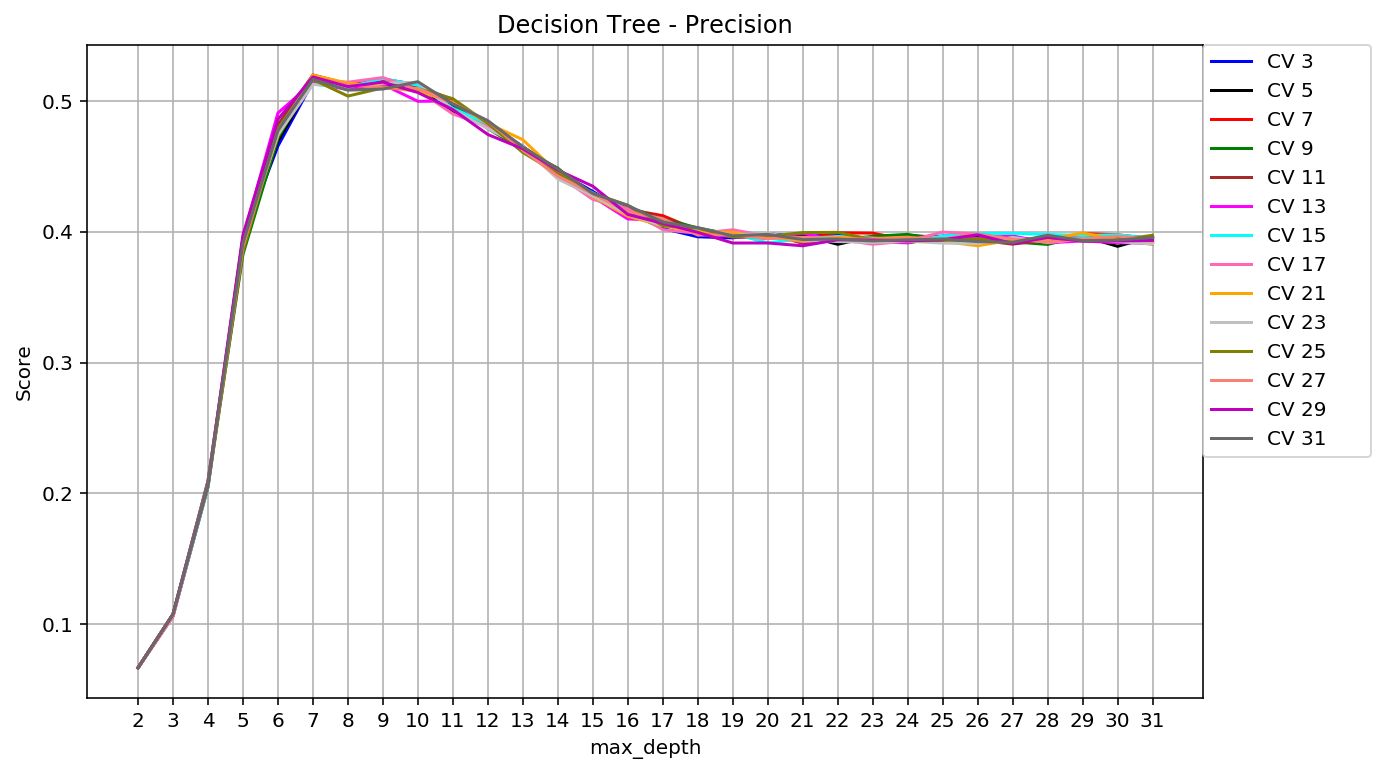

In [89]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,precision_tree_kf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,precision_tree_kf[1], color = 'Black', label = 'CV 5')
ax.plot(c,precision_tree_kf[2], color = 'Red', label = 'CV 7')
ax.plot(c,precision_tree_kf[3], color = 'Green', label = 'CV 9')
ax.plot(c,precision_tree_kf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,precision_tree_kf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,precision_tree_kf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,precision_tree_kf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,precision_tree_kf[8], color = 'orange', label = 'CV 21')
ax.plot(c,precision_tree_kf[9], color = 'silver', label = 'CV 23')
ax.plot(c,precision_tree_kf[10], color = 'olive', label = 'CV 25')
ax.plot(c,precision_tree_kf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,precision_tree_kf[12], color = 'm', label = 'CV 29')
ax.plot(c,precision_tree_kf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Precision')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

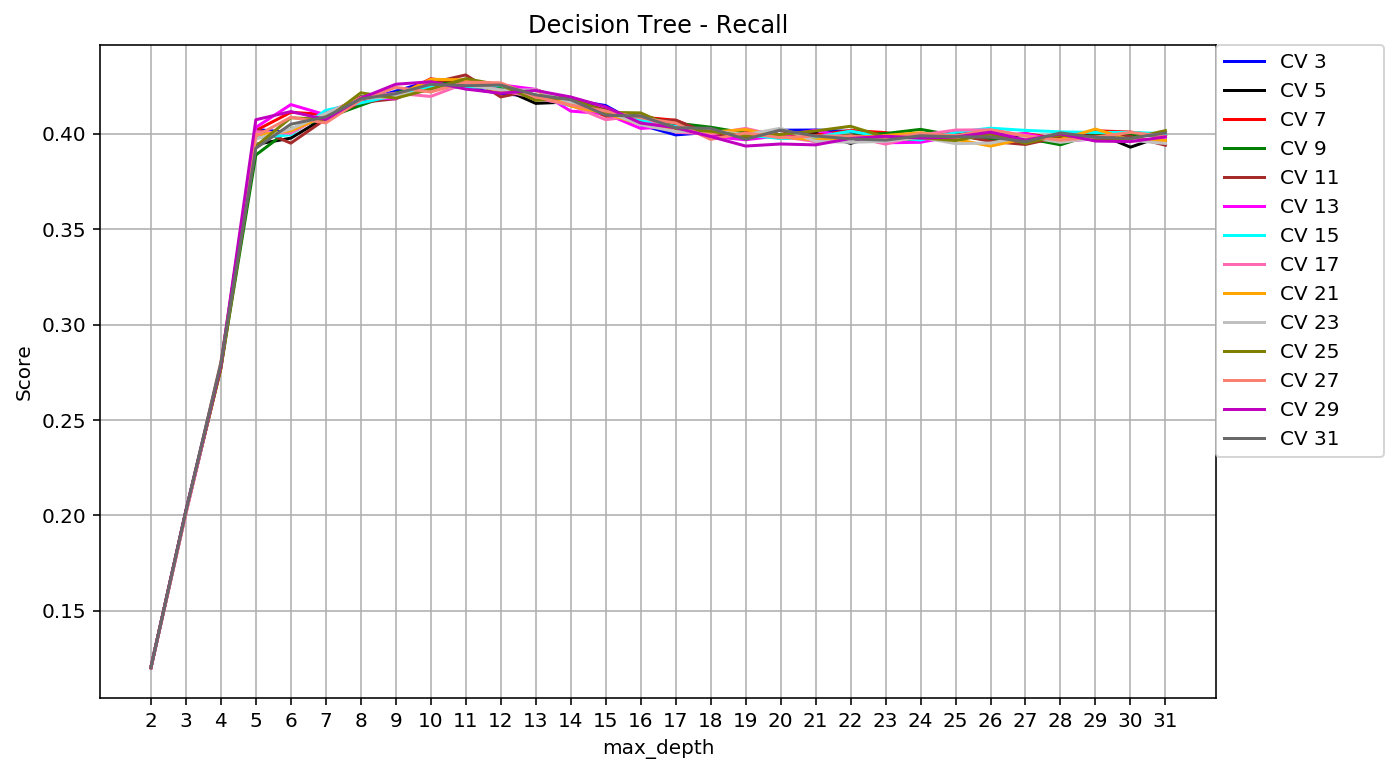

In [90]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,recall_tree_kf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,recall_tree_kf[1], color = 'Black', label = 'CV 5')
ax.plot(c,recall_tree_kf[2], color = 'Red', label = 'CV 7')
ax.plot(c,recall_tree_kf[3], color = 'Green', label = 'CV 9')
ax.plot(c,recall_tree_kf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,recall_tree_kf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,recall_tree_kf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,recall_tree_kf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,recall_tree_kf[8], color = 'orange', label = 'CV 21')
ax.plot(c,recall_tree_kf[9], color = 'silver', label = 'CV 23')
ax.plot(c,recall_tree_kf[10], color = 'olive', label = 'CV 25')
ax.plot(c,recall_tree_kf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,recall_tree_kf[12], color = 'm', label = 'CV 29')
ax.plot(c,recall_tree_kf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Recall')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=17></a>
**<h3>3.2  Random Forest - StratifiedKFold</h3>**

In [69]:
score_mean_rf_kf = []
precision_rf_kf = []
recall_rf_kf = []

a = 3

for d in range(15):

    kf = StratifiedKFold(n_splits=a,shuffle=True)
    
    print("cv:", a)
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(30):
        
            rf = RandomForestClassifier(n_estimators=n)

            print("max_depth:", n)

            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kf.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                rf.fit(xtr,ytr)

                score = accuracy_score(yvl,rf.predict(xvl))
                precision = precision_score(yvl, rf.predict(xvl), average = 'macro')
                recall = recall_score(yvl, rf.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_rf_kf.append(cv_score_mean)
    precision_rf_kf.append(cv_precision_mean)
    recall_rf_kf.append(cv_recall_mean)

cv: 3
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
cv: 5
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 13
max_depth: 14
max_depth: 15
max_depth: 16
max_depth: 17
max_depth: 18
max_depth: 19
max_depth: 20
max_depth: 21
max_depth: 22
max_depth: 23
max_depth: 24
max_depth: 25
max_depth: 26
max_depth: 27
max_depth: 28
max_depth: 29
max_depth: 30
max_depth: 31
cv: 7
max_depth: 2
max_depth: 3
max_depth: 4
max_depth: 5
max_depth: 6
max_depth: 7
max_depth: 8
max_depth: 9
max_depth: 10
max_depth: 11
max_depth: 12
max_depth: 1

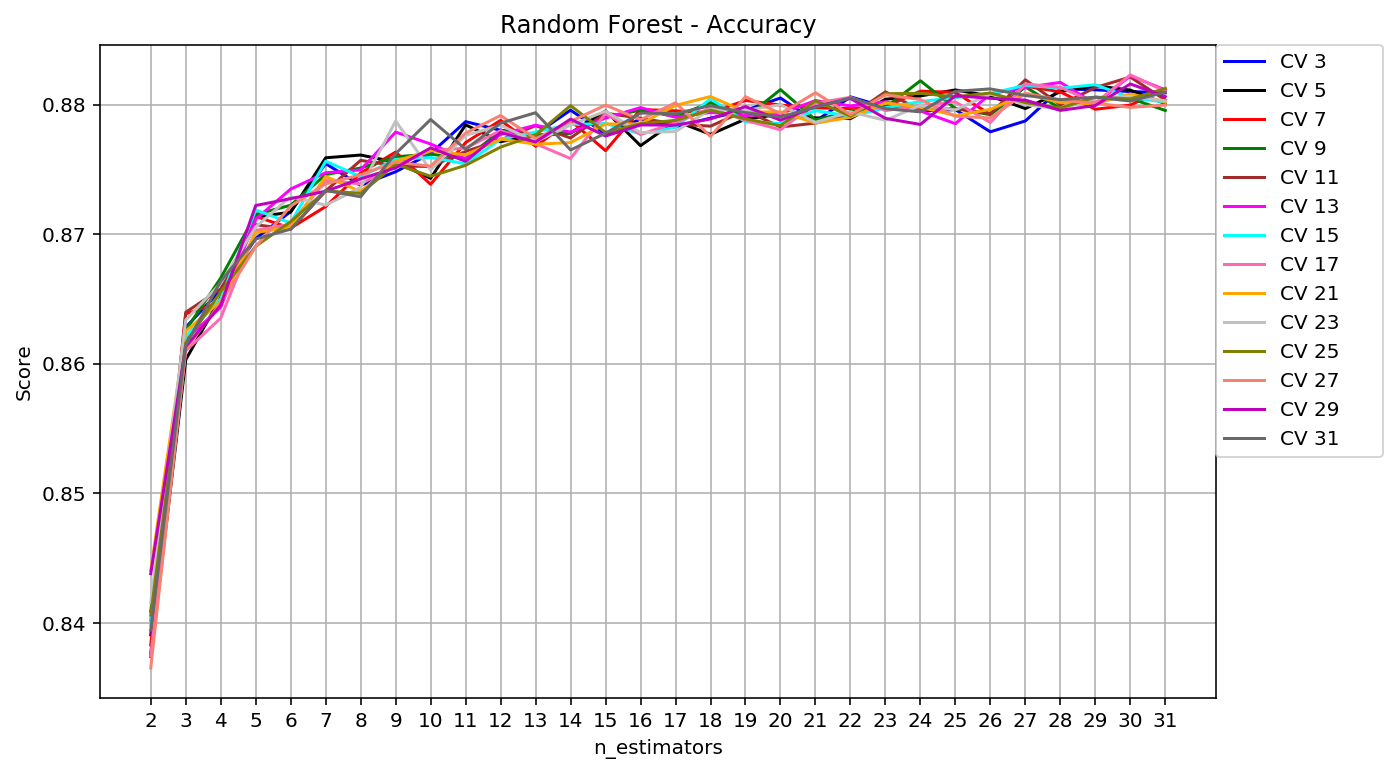

In [91]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,score_mean_rf_kf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,score_mean_rf_kf[1], color = 'Black', label = 'CV 5')
ax.plot(c,score_mean_rf_kf[2], color = 'Red', label = 'CV 7')
ax.plot(c,score_mean_rf_kf[3], color = 'Green', label = 'CV 9')
ax.plot(c,score_mean_rf_kf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,score_mean_rf_kf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,score_mean_rf_kf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,score_mean_rf_kf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,score_mean_rf_kf[8], color = 'orange', label = 'CV 21')
ax.plot(c,score_mean_rf_kf[9], color = 'silver', label = 'CV 23')
ax.plot(c,score_mean_rf_kf[10], color = 'olive', label = 'CV 25')
ax.plot(c,score_mean_rf_kf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,score_mean_rf_kf[12], color = 'm', label = 'CV 29')
ax.plot(c,score_mean_rf_kf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Accuracy')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

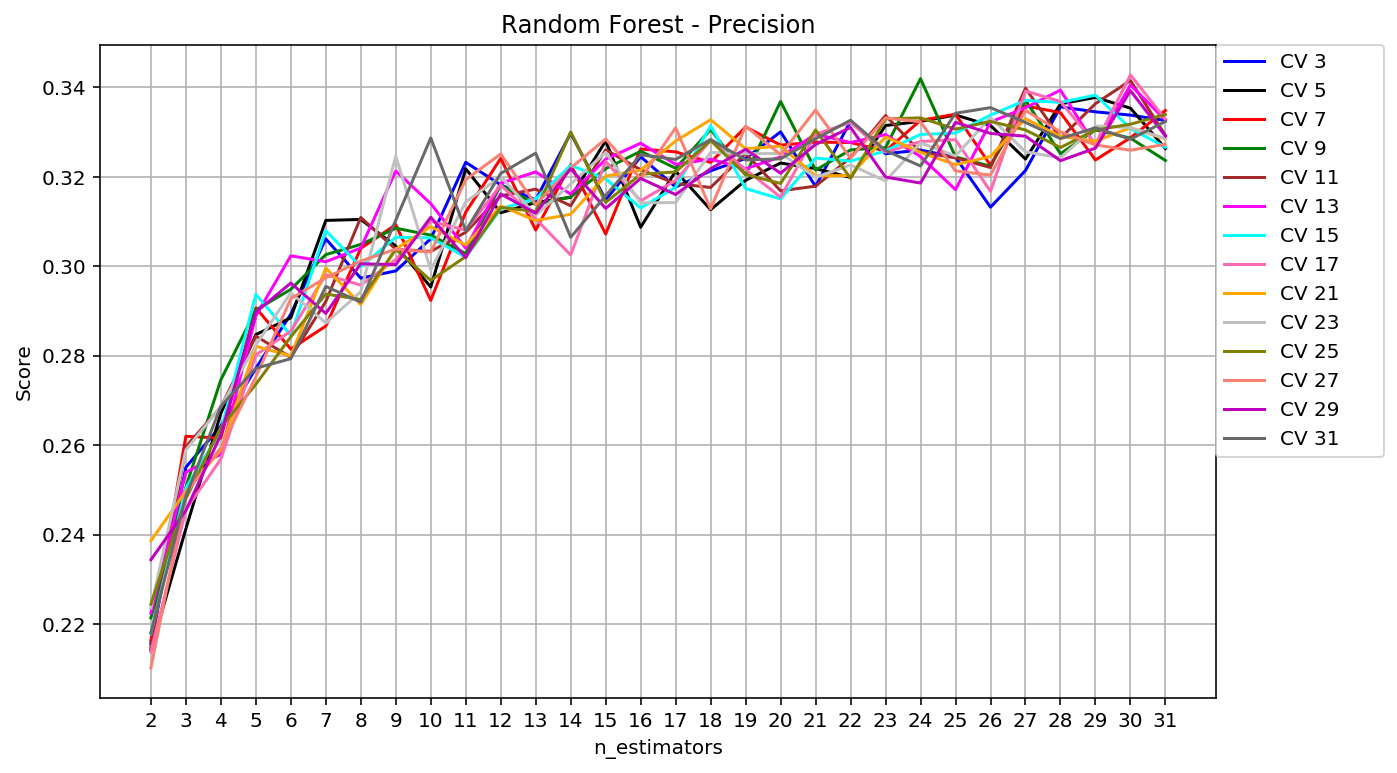

In [94]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,precision_rf_kf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,precision_rf_kf[1], color = 'Black', label = 'CV 5')
ax.plot(c,precision_rf_kf[2], color = 'Red', label = 'CV 7')
ax.plot(c,precision_rf_kf[3], color = 'Green', label = 'CV 9')
ax.plot(c,precision_rf_kf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,precision_rf_kf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,precision_rf_kf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,precision_rf_kf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,precision_rf_kf[8], color = 'orange', label = 'CV 21')
ax.plot(c,precision_rf_kf[9], color = 'silver', label = 'CV 23')
ax.plot(c,precision_rf_kf[10], color = 'olive', label = 'CV 25')
ax.plot(c,precision_rf_kf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,precision_rf_kf[12], color = 'm', label = 'CV 29')
ax.plot(c,precision_rf_kf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Precision')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

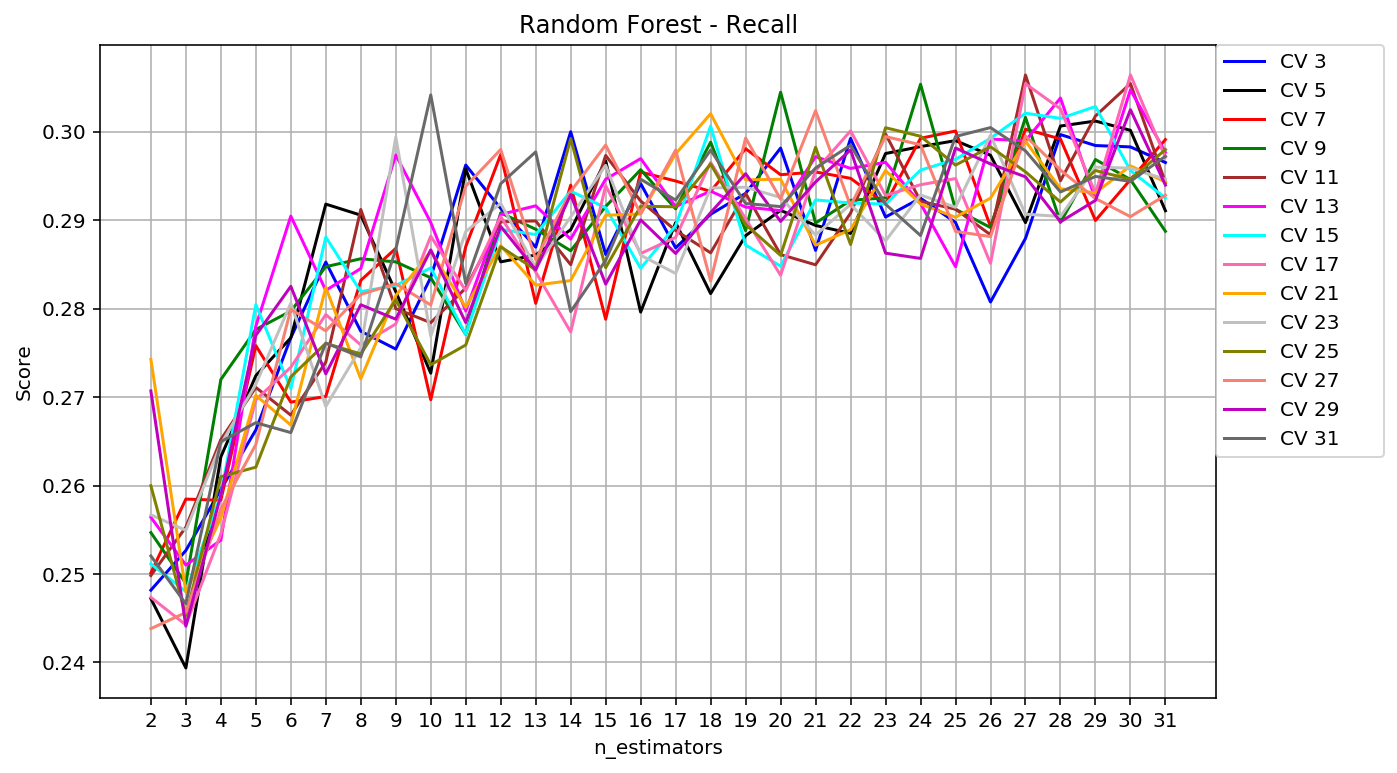

In [95]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,recall_rf_kf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,recall_rf_kf[1], color = 'Black', label = 'CV 5')
ax.plot(c,recall_rf_kf[2], color = 'Red', label = 'CV 7')
ax.plot(c,recall_rf_kf[3], color = 'Green', label = 'CV 9')
ax.plot(c,recall_rf_kf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,recall_rf_kf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,recall_rf_kf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,recall_rf_kf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,recall_rf_kf[8], color = 'orange', label = 'CV 21')
ax.plot(c,recall_rf_kf[9], color = 'silver', label = 'CV 23')
ax.plot(c,recall_rf_kf[10], color = 'olive', label = 'CV 25')
ax.plot(c,recall_rf_kf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,recall_rf_kf[12], color = 'm', label = 'CV 29')
ax.plot(c,recall_rf_kf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Recall')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=18></a>
**<h3>3.3 Logisctic Regression - StratifiedKFold</h3>**

In [71]:
cv_score_mean_lr_kf =[]
cv_precision_mean_lr_kf = []
cv_recall_mean_lr_kf = []

n = 3

for a in range(15):
    
        print("CV:", n)
        
        lr= LogisticRegression()


        kf = StratifiedKFold(n_splits=n+2,shuffle=True)

        cv_score =[]
        cv_precision = []
        cv_recall = []
        i=1

        for train_index,test_index in kf.split(X,y):

            xtr,xvl = X[train_index],X[test_index]
            ytr,yvl = y[train_index],y[test_index]

            lr.fit(xtr,ytr)
            score = accuracy_score(yvl,lr.predict(xvl))  
            precision = precision_score(yvl, lr.predict(xvl), average = 'macro')
            recall = recall_score(yvl, lr.predict(xvl), average = 'macro')

            cv_score.append(score)  
            cv_precision.append(precision)
            cv_recall.append(recall)

            i+=1
            
        n +=2 
        
        score_mean = np.mean(cv_score)
        precision_mean = np.mean(cv_precision)
        recall_mean = np.mean(cv_recall)
        
        cv_score_mean_lr_kf.append(score_mean)  
        cv_precision_mean_lr_kf.append(precision_mean)
        cv_recall_mean_lr_kf.append(recall_mean)


CV: 3
CV: 5
CV: 7
CV: 9
CV: 11
CV: 13
CV: 15
CV: 17
CV: 19
CV: 21
CV: 23
CV: 25
CV: 27
CV: 29
CV: 31


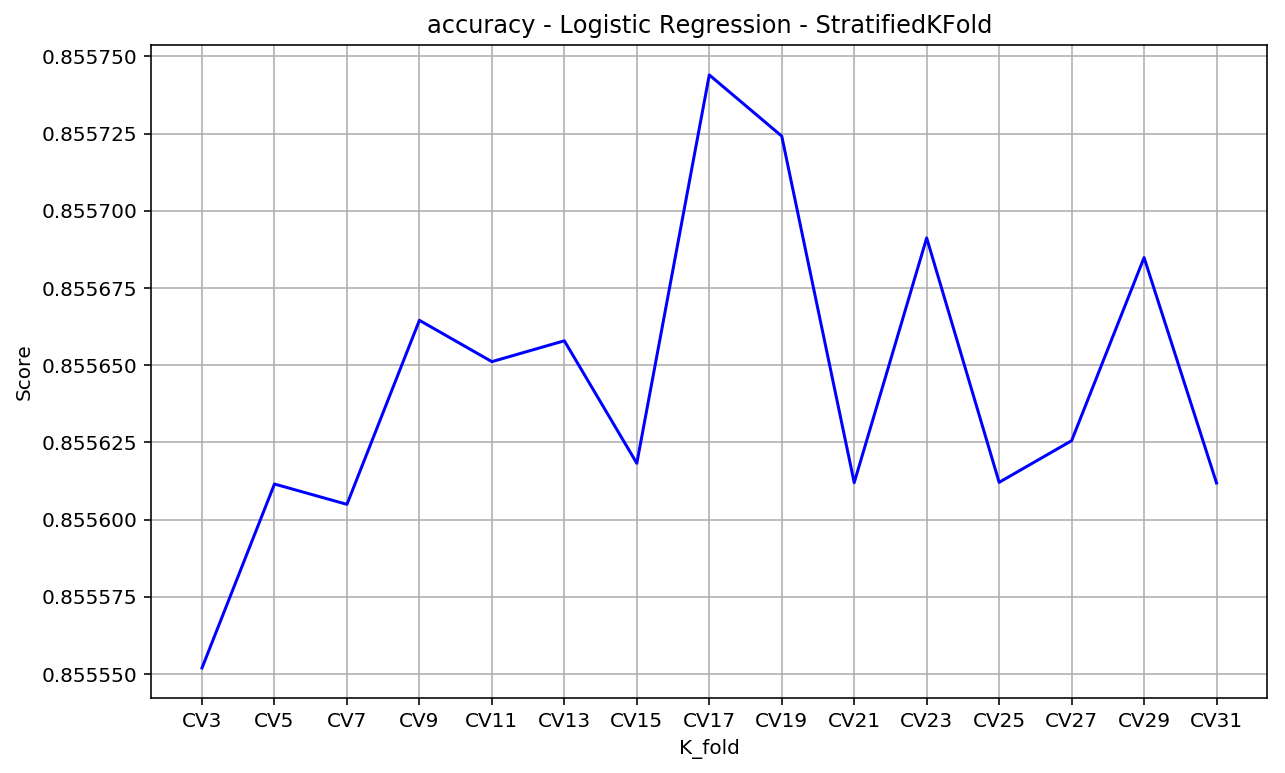

In [105]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_score_mean_lr_kf, color = 'Blue')



plt.xlabel('K_fold')
plt.ylabel('Score')
plt.title('accuracy - Logistic Regression - StratifiedKFold')


plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

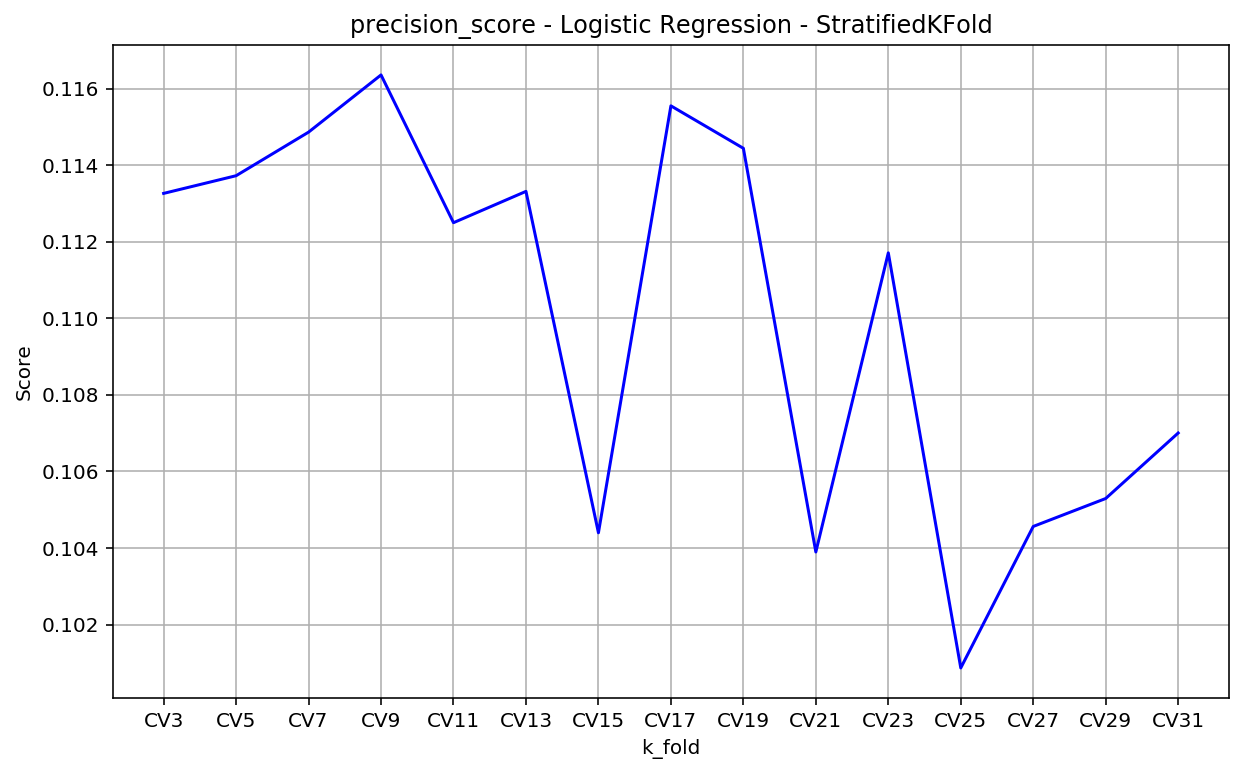

In [106]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_precision_mean_lr_kf, color = 'Blue')



plt.xlabel('k_fold')
plt.ylabel('Score')
plt.title('precision_score - Logistic Regression - StratifiedKFold')



plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

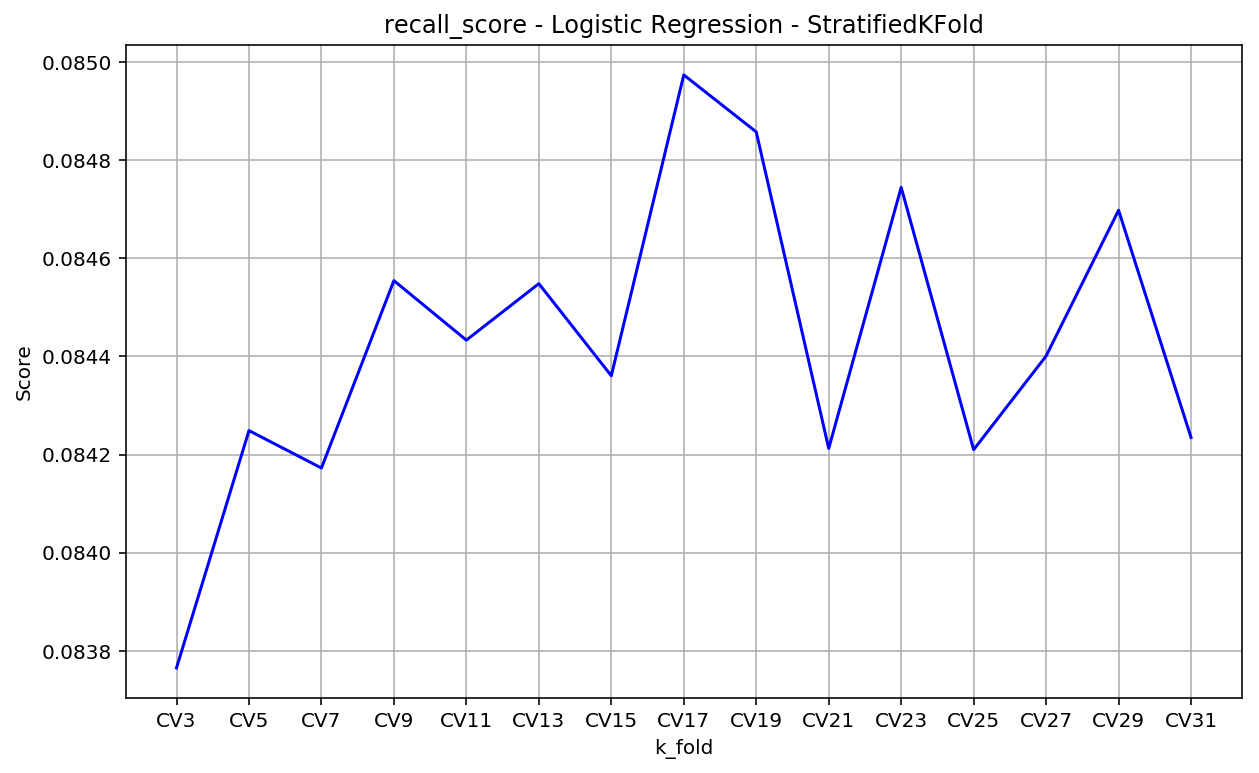

In [107]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_recall_mean_lr_kf, color = 'Blue')



plt.xlabel('k_fold')
plt.ylabel('Score')
plt.title('recall_score - Logistic Regression - StratifiedKFold')



plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=19></a>
**<h2>4 Elección del modelos</h2>**

Se ha decidido ver los resultado para DecissionTree, con max_depth =  Max_depth 10 y un Cv5, que es el que mejor resltados tiene. 

In [110]:
kfold = KFold(n_splits = 5,shuffle=True)



cv_score_mean =[]
cv_precision_mean = []
cv_recall_mean = []


tree = DecisionTreeClassifier(criterion = 'entropy',
          max_depth = 10,
          random_state = 0)



cv_score =[]
cv_precision = []
cv_recall = []

i=1

for train_index,test_index in kfold.split(X,y):

    xtr,xvl = X[train_index],X[test_index]
    ytr,yvl = y[train_index],y[test_index]

    tree.fit(xtr,ytr)

    score = accuracy_score(yvl,tree.predict(xvl))
    precision = precision_score(yvl, tree.predict(xvl), average = 'macro')
    recall = recall_score(yvl, tree.predict(xvl), average = 'macro')

    cv_score.append(score)
    cv_precision.append(precision)
    cv_recall.append(recall)


    i+=1


score_mean = np.mean(cv_score)
precision_mean = np.mean(cv_precision)
recall_mean = np.mean(cv_recall)



In [111]:
        print('Resultados finales')
        print(' Accuracy: %2f' % score_mean)
        print(' Precision: %2f' % precision_mean )
        print(' Recall: %2f' % recall_mean)

Resultados finales
 Accuracy: 0.901274
 Precision: 0.511478
 Recall: 0.425433


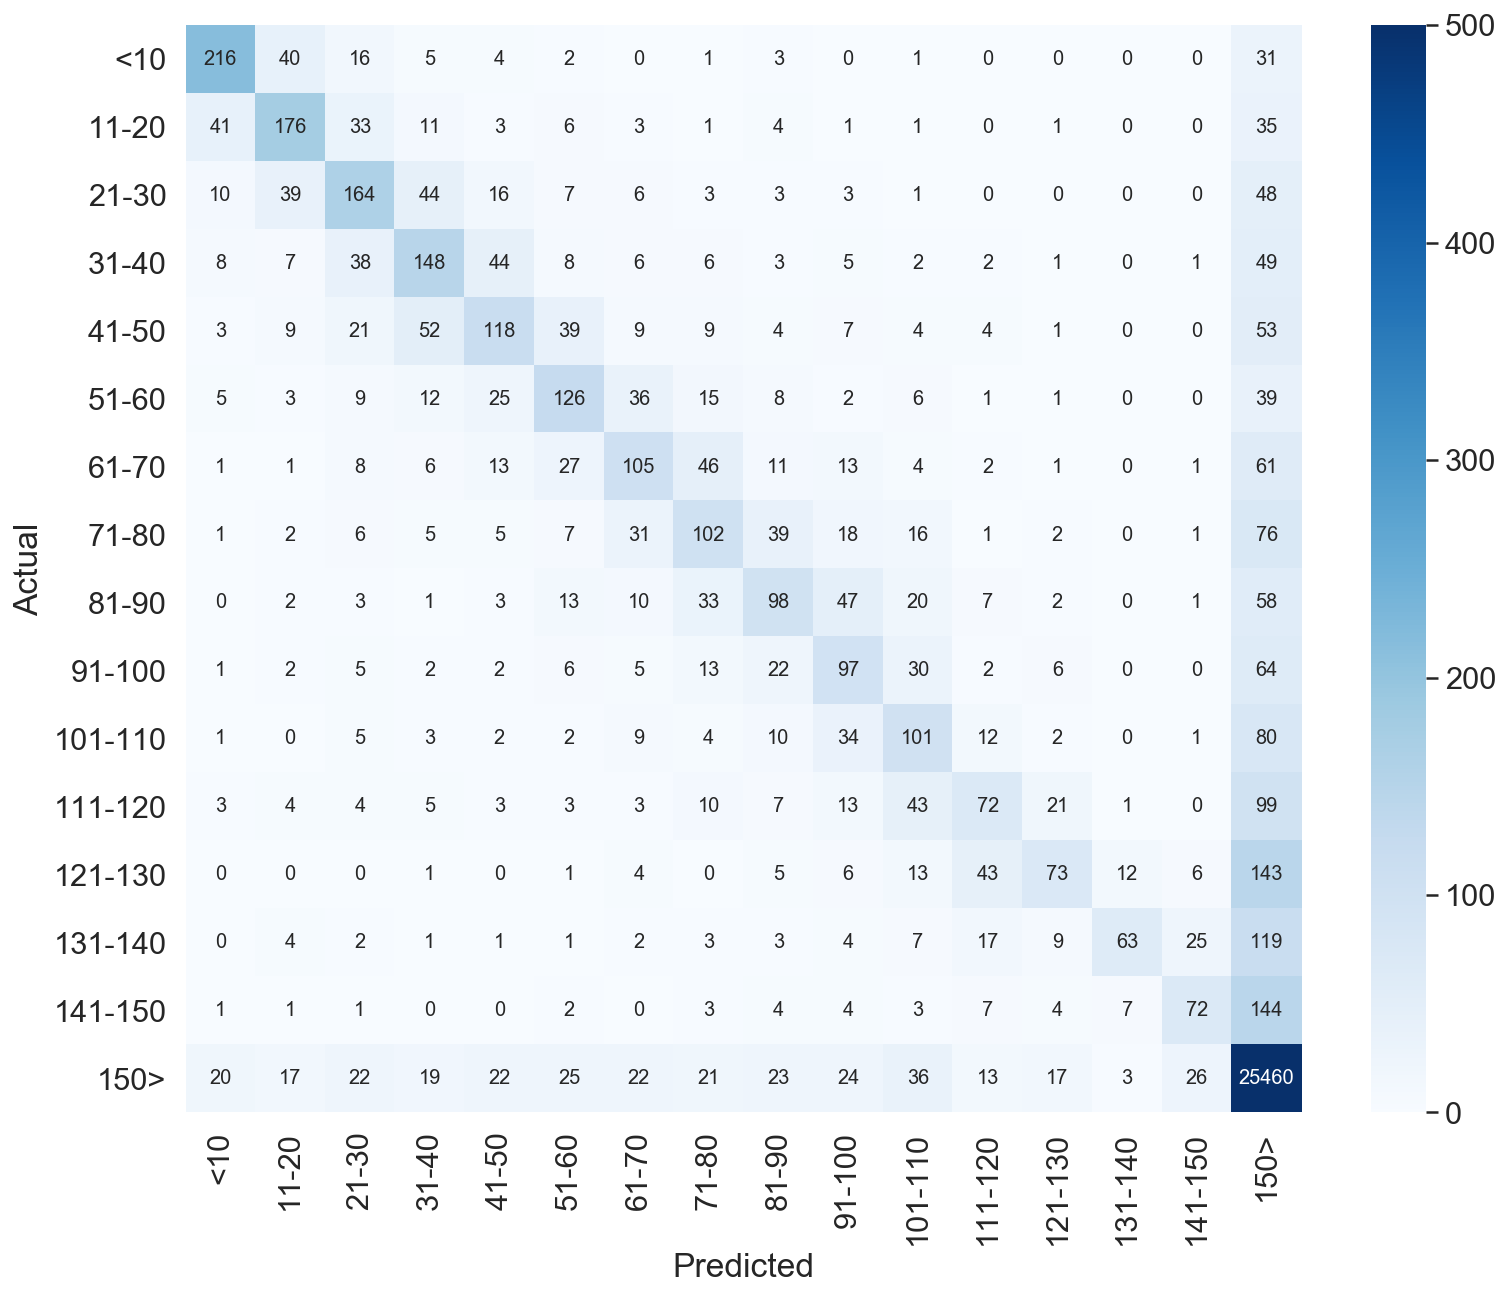

In [112]:
conf_mat = confusion_matrix(yvl, tree.predict(xvl))

df_cm = pd.DataFrame(conf_mat, columns=np.unique(y), index = np.unique(y))

df_cm.rename(index = {10: "<10", 
                 20:"11-20",
                 30:"21-30",
                 40:"31-40",
                 50:"41-50",
                 60:"51-60",
                 70:"61-70",
                 80:"71-80",
                 90:"81-90",
                 100:"91-100",
                 110:"101-110",
                 120:"111-120",
                 130:"121-130",
                 140:"131-140",
                 150:"141-150",
                 200:"150>"  
                }, 
                inplace = True)

df_cm.rename(columns = {10: "<10", 
                 20:"11-20",
                 30:"21-30",
                 40:"31-40",
                 50:"41-50",
                 60:"51-60",
                 70:"61-70",
                 80:"71-80",
                 90:"81-90",
                 100:"91-100",
                 110:"101-110",
                 120:"111-120",
                 130:"121-130",
                 140:"131-140",
                 150:"141-150",
                 200:"150>"  
                }, 
                inplace = True)

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12.5,10))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,fmt = "d",annot_kws={"size": 10}, vmax = 500)
